In [ ]:
from __future__ import print_function, division
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
from skimage import data
from statistics import mean
from itertools import chain

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')
path_covid_data='DMV_Assess_1_Covid-19_Dataset/Covid-19'
images_covid = os.listdir(path_covid_data)
size = (512, 512)


def load_image_data():
  filenames = os.listdir(path_covid_data)
  data_covid=[]
  for i in range(len(images_covid)):
    img = cv.imread(path_covid_data+'/'+str(images_covid[i]))
    b=[]
    if len(cv.split(img))==1:
      b=img
    else:
      b=cv.split(img)[0]
    img_resized = cv.resize(b, size)
    img_resized = np.array(img_resized, dtype=np.uint8)
    # cv2_imshow(img_resized)
    img_np = np.asarray(img_resized, dtype="int32" )
    cv.waitKey()
    data_covid.append(img_np)
  return np.array(data_covid), np.array([1 for i in range(100)])

Mounted at /content/drive


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               134218240 
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)              

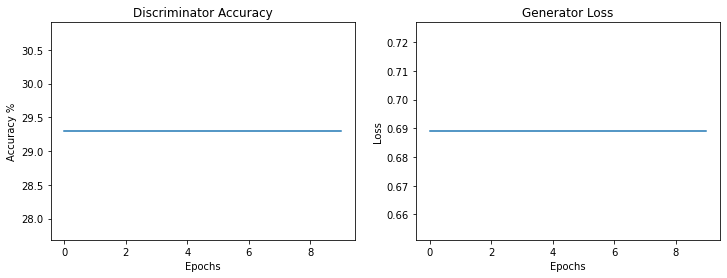

1 [D loss: 0.355615, acc.: 50.00%] [G loss: 0.691080]
2 [D loss: 0.350326, acc.: 50.00%] [G loss: 0.694281]
3 [D loss: 0.347453, acc.: 59.57%] [G loss: 0.701197]
4 [D loss: 0.342652, acc.: 100.00%] [G loss: 0.714395]
5 [D loss: 0.335082, acc.: 100.00%] [G loss: 0.681472]
6 [D loss: 0.297248, acc.: 100.00%] [G loss: 0.659366]
7 [D loss: 0.203257, acc.: 100.00%] [G loss: 1.518969]
8 [D loss: 0.196287, acc.: 100.00%] [G loss: 1.233206]
9 [D loss: 0.365194, acc.: 53.91%] [G loss: 1.280868]
10 [D loss: 0.248414, acc.: 100.00%] [G loss: 0.981029]
11 [D loss: 0.225319, acc.: 100.00%] [G loss: 0.912236]
12 [D loss: 0.176260, acc.: 100.00%] [G loss: 1.124076]
13 [D loss: 0.138111, acc.: 99.41%] [G loss: 1.361222]
14 [D loss: 7.865309, acc.: 27.34%] [G loss: 0.496776]
15 [D loss: 1.279264, acc.: 48.63%] [G loss: 0.332953]
16 [D loss: 0.732453, acc.: 50.00%] [G loss: 0.442515]
17 [D loss: 0.402456, acc.: 57.42%] [G loss: 0.824134]
18 [D loss: 0.101059, acc.: 100.00%] [G loss: 1.545419]
19 [D loss

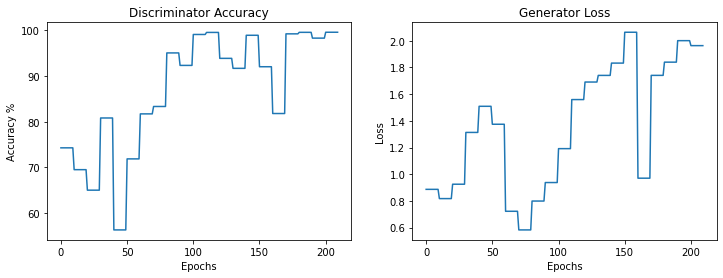

201 [D loss: 0.033246, acc.: 99.61%] [G loss: 2.020320]
202 [D loss: 0.025631, acc.: 99.80%] [G loss: 2.471201]
203 [D loss: 0.089487, acc.: 99.02%] [G loss: 2.843441]
204 [D loss: 0.179375, acc.: 96.68%] [G loss: 2.513270]
205 [D loss: 0.010010, acc.: 99.80%] [G loss: 2.972057]
206 [D loss: 0.253090, acc.: 95.70%] [G loss: 1.724942]
207 [D loss: 0.007811, acc.: 100.00%] [G loss: 2.503158]
208 [D loss: 0.092185, acc.: 96.48%] [G loss: 1.397850]
209 [D loss: 0.076591, acc.: 100.00%] [G loss: 2.022946]
210 [D loss: 0.008632, acc.: 100.00%] [G loss: 2.289025]
211 [D loss: 0.044084, acc.: 99.22%] [G loss: 1.575716]
212 [D loss: 0.035895, acc.: 100.00%] [G loss: 1.994491]
213 [D loss: 0.014970, acc.: 100.00%] [G loss: 2.318073]
214 [D loss: 0.018955, acc.: 99.80%] [G loss: 2.149074]
215 [D loss: 0.033490, acc.: 99.80%] [G loss: 2.056884]
216 [D loss: 0.033603, acc.: 99.61%] [G loss: 2.062651]
217 [D loss: 0.065990, acc.: 99.41%] [G loss: 2.142152]
218 [D loss: 0.025975, acc.: 99.80%] [G los

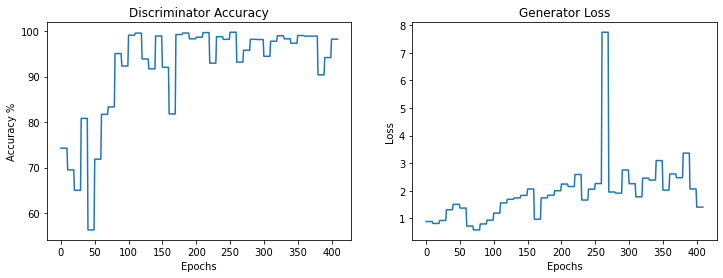

401 [D loss: 0.264261, acc.: 95.90%] [G loss: 1.397933]
402 [D loss: 0.159748, acc.: 95.12%] [G loss: 1.446218]
403 [D loss: 0.111324, acc.: 97.46%] [G loss: 1.564986]
404 [D loss: 0.090876, acc.: 98.24%] [G loss: 1.602922]
405 [D loss: 0.081403, acc.: 98.05%] [G loss: 1.953010]
406 [D loss: 0.068113, acc.: 99.02%] [G loss: 2.091656]
407 [D loss: 0.073854, acc.: 98.24%] [G loss: 1.757880]
408 [D loss: 0.071793, acc.: 98.44%] [G loss: 1.970268]
409 [D loss: 0.084953, acc.: 96.88%] [G loss: 2.064351]
410 [D loss: 0.082273, acc.: 98.05%] [G loss: 2.414928]
411 [D loss: 0.104472, acc.: 96.88%] [G loss: 2.381938]
412 [D loss: 0.047266, acc.: 98.83%] [G loss: 2.299998]
413 [D loss: 0.173049, acc.: 97.46%] [G loss: 2.544015]
414 [D loss: 0.268772, acc.: 89.84%] [G loss: 1.455122]
415 [D loss: 0.087323, acc.: 99.41%] [G loss: 2.264901]
416 [D loss: 0.013676, acc.: 99.80%] [G loss: 2.838762]
417 [D loss: 0.052442, acc.: 96.48%] [G loss: 2.949107]
418 [D loss: 0.027932, acc.: 99.02%] [G loss: 2.

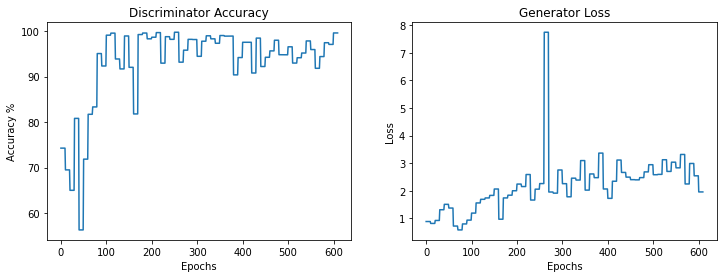

601 [D loss: 0.060365, acc.: 99.02%] [G loss: 2.362218]
602 [D loss: 0.076736, acc.: 98.24%] [G loss: 2.390935]
603 [D loss: 0.066120, acc.: 98.44%] [G loss: 2.584460]
604 [D loss: 0.177487, acc.: 96.68%] [G loss: 2.405442]
605 [D loss: 0.063018, acc.: 98.83%] [G loss: 2.156691]
606 [D loss: 0.059884, acc.: 98.44%] [G loss: 2.051462]
607 [D loss: 0.108624, acc.: 97.27%] [G loss: 2.453861]
608 [D loss: 0.052982, acc.: 98.44%] [G loss: 2.336851]
609 [D loss: 0.098439, acc.: 97.85%] [G loss: 2.509750]
610 [D loss: 0.094066, acc.: 97.66%] [G loss: 2.709403]
611 [D loss: 0.206537, acc.: 93.75%] [G loss: 3.403027]
612 [D loss: 0.159623, acc.: 96.09%] [G loss: 4.134026]
613 [D loss: 0.062851, acc.: 97.66%] [G loss: 2.173694]
614 [D loss: 0.085568, acc.: 97.46%] [G loss: 2.459619]
615 [D loss: 0.026319, acc.: 99.22%] [G loss: 2.691298]
616 [D loss: 0.064055, acc.: 98.63%] [G loss: 3.053759]
617 [D loss: 0.050862, acc.: 97.66%] [G loss: 2.593706]
618 [D loss: 0.281967, acc.: 88.09%] [G loss: 6.

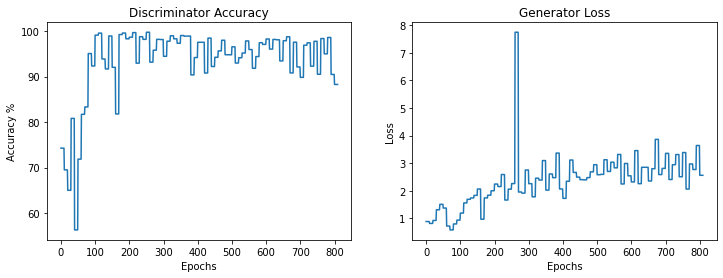

801 [D loss: 0.191161, acc.: 93.16%] [G loss: 1.839877]
802 [D loss: 0.121956, acc.: 100.00%] [G loss: 1.354678]
803 [D loss: 0.087043, acc.: 99.80%] [G loss: 2.036312]
804 [D loss: 0.040810, acc.: 99.61%] [G loss: 2.403516]
805 [D loss: 0.066086, acc.: 99.41%] [G loss: 2.513448]
806 [D loss: 0.163138, acc.: 97.66%] [G loss: 3.304691]
807 [D loss: 0.133069, acc.: 96.68%] [G loss: 2.392823]
808 [D loss: 1.260753, acc.: 46.68%] [G loss: 3.468147]
809 [D loss: 0.465599, acc.: 84.77%] [G loss: 3.200164]
810 [D loss: 0.343441, acc.: 87.11%] [G loss: 1.762853]
811 [D loss: 0.378089, acc.: 79.69%] [G loss: 2.333873]
812 [D loss: 0.133266, acc.: 92.58%] [G loss: 2.950298]
813 [D loss: 0.127440, acc.: 94.53%] [G loss: 1.855978]
814 [D loss: 0.081275, acc.: 98.44%] [G loss: 1.302030]
815 [D loss: 0.082456, acc.: 98.83%] [G loss: 1.866236]
816 [D loss: 0.087123, acc.: 98.05%] [G loss: 1.547384]
817 [D loss: 0.083619, acc.: 97.85%] [G loss: 1.580140]
818 [D loss: 0.074057, acc.: 97.85%] [G loss: 1

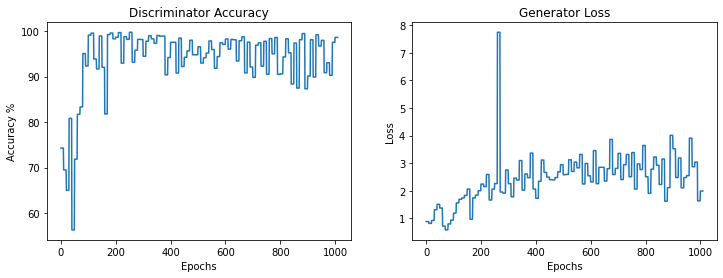

1001 [D loss: 0.038247, acc.: 99.41%] [G loss: 1.998986]
1002 [D loss: 0.094936, acc.: 97.46%] [G loss: 1.742865]
1003 [D loss: 0.051039, acc.: 98.83%] [G loss: 1.982406]
1004 [D loss: 0.050447, acc.: 99.02%] [G loss: 1.910691]
1005 [D loss: 0.045069, acc.: 98.83%] [G loss: 1.854087]
1006 [D loss: 0.057055, acc.: 98.83%] [G loss: 1.797506]
1007 [D loss: 0.058619, acc.: 98.24%] [G loss: 2.115080]
1008 [D loss: 0.054813, acc.: 99.02%] [G loss: 2.010379]
1009 [D loss: 0.027466, acc.: 99.41%] [G loss: 2.422894]
1010 [D loss: 0.037193, acc.: 99.02%] [G loss: 2.409588]
1011 [D loss: 0.029292, acc.: 99.41%] [G loss: 2.403702]
1012 [D loss: 0.032862, acc.: 99.61%] [G loss: 2.305787]
1013 [D loss: 0.079576, acc.: 99.41%] [G loss: 3.193299]
1014 [D loss: 0.045108, acc.: 97.85%] [G loss: 3.191050]
1015 [D loss: 0.083816, acc.: 96.29%] [G loss: 2.631343]
1016 [D loss: 0.055393, acc.: 99.22%] [G loss: 2.737312]
1017 [D loss: 0.026890, acc.: 99.61%] [G loss: 3.114746]
1018 [D loss: 0.016983, acc.: 1

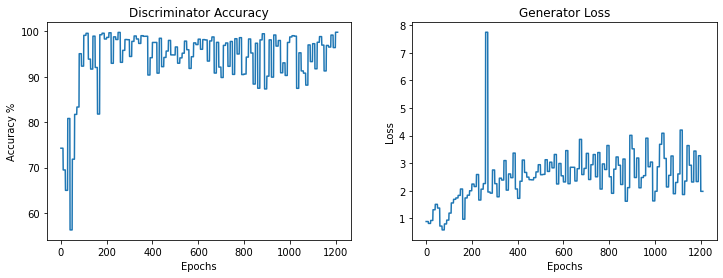

1201 [D loss: 0.022545, acc.: 100.00%] [G loss: 2.038089]
1202 [D loss: 0.028917, acc.: 100.00%] [G loss: 2.105868]
1203 [D loss: 0.029953, acc.: 99.80%] [G loss: 2.331276]
1204 [D loss: 0.039906, acc.: 99.61%] [G loss: 2.243387]
1205 [D loss: 0.048874, acc.: 99.02%] [G loss: 2.509661]
1206 [D loss: 0.046832, acc.: 99.22%] [G loss: 2.742275]
1207 [D loss: 0.031301, acc.: 99.61%] [G loss: 2.870767]
1208 [D loss: 0.108204, acc.: 97.46%] [G loss: 4.539796]
1209 [D loss: 0.140100, acc.: 96.09%] [G loss: 3.684124]
1210 [D loss: 0.137926, acc.: 97.07%] [G loss: 2.760623]
1211 [D loss: 0.088955, acc.: 97.85%] [G loss: 3.543255]
1212 [D loss: 0.050486, acc.: 98.83%] [G loss: 3.221137]
1213 [D loss: 0.102470, acc.: 98.44%] [G loss: 3.834663]
1214 [D loss: 0.062068, acc.: 98.44%] [G loss: 2.647457]
1215 [D loss: 0.104737, acc.: 97.85%] [G loss: 3.757848]
1216 [D loss: 0.086461, acc.: 97.07%] [G loss: 2.628015]
1217 [D loss: 0.199770, acc.: 96.48%] [G loss: 5.008310]
1218 [D loss: 0.180742, acc.:

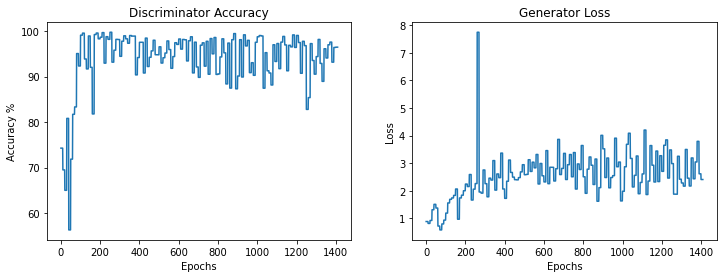

1401 [D loss: 0.690168, acc.: 55.27%] [G loss: 6.393629]
1402 [D loss: 0.497900, acc.: 88.09%] [G loss: 3.767215]
1403 [D loss: 0.256697, acc.: 95.12%] [G loss: 1.787679]
1404 [D loss: 0.227272, acc.: 94.34%] [G loss: 1.982952]
1405 [D loss: 0.094042, acc.: 95.90%] [G loss: 2.238530]
1406 [D loss: 0.108043, acc.: 97.27%] [G loss: 2.365008]
1407 [D loss: 0.083828, acc.: 97.66%] [G loss: 2.398835]
1408 [D loss: 0.110733, acc.: 96.88%] [G loss: 3.116594]
1409 [D loss: 0.057981, acc.: 98.24%] [G loss: 2.528162]
1410 [D loss: 0.088744, acc.: 97.66%] [G loss: 2.269101]
1411 [D loss: 0.102747, acc.: 97.66%] [G loss: 2.333788]
1412 [D loss: 0.123509, acc.: 96.09%] [G loss: 2.382927]
1413 [D loss: 0.274872, acc.: 90.82%] [G loss: 4.032341]
1414 [D loss: 0.174449, acc.: 94.14%] [G loss: 3.213336]
1415 [D loss: 0.147529, acc.: 95.51%] [G loss: 1.873894]
1416 [D loss: 0.229820, acc.: 92.58%] [G loss: 3.133447]
1417 [D loss: 0.065441, acc.: 96.88%] [G loss: 3.368355]
1418 [D loss: 0.140155, acc.: 9

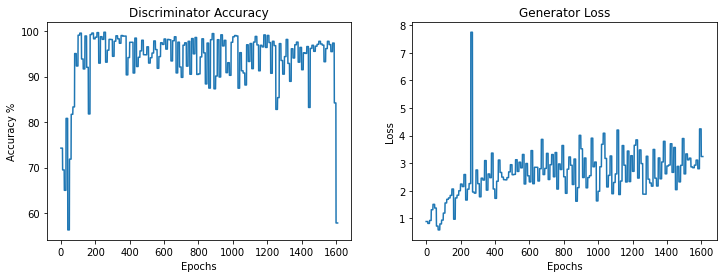

1601 [D loss: 0.381323, acc.: 84.57%] [G loss: 3.853685]
1602 [D loss: 0.371626, acc.: 84.77%] [G loss: 2.055438]
1603 [D loss: 0.101186, acc.: 95.70%] [G loss: 1.724816]
1604 [D loss: 0.094770, acc.: 96.68%] [G loss: 1.728017]
1605 [D loss: 0.070410, acc.: 98.83%] [G loss: 1.537745]
1606 [D loss: 0.056152, acc.: 99.22%] [G loss: 1.765947]
1607 [D loss: 0.059977, acc.: 98.44%] [G loss: 1.714503]
1608 [D loss: 0.037051, acc.: 99.80%] [G loss: 1.965920]
1609 [D loss: 0.042908, acc.: 99.22%] [G loss: 2.087245]
1610 [D loss: 0.057739, acc.: 98.83%] [G loss: 1.936423]
1611 [D loss: 0.073708, acc.: 98.24%] [G loss: 2.172269]
1612 [D loss: 0.085620, acc.: 97.85%] [G loss: 2.346599]
1613 [D loss: 0.063902, acc.: 98.63%] [G loss: 2.304081]
1614 [D loss: 0.103934, acc.: 97.27%] [G loss: 2.450404]
1615 [D loss: 0.121315, acc.: 96.88%] [G loss: 3.245261]
1616 [D loss: 0.102344, acc.: 96.29%] [G loss: 2.698097]
1617 [D loss: 0.413394, acc.: 78.12%] [G loss: 4.290302]
1618 [D loss: 0.458909, acc.: 8

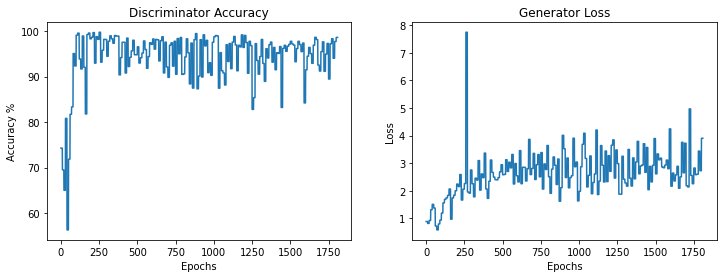

1801 [D loss: 0.021596, acc.: 99.41%] [G loss: 2.999146]
1802 [D loss: 0.026811, acc.: 99.22%] [G loss: 2.388319]
1803 [D loss: 0.026755, acc.: 100.00%] [G loss: 2.483024]
1804 [D loss: 0.036326, acc.: 99.41%] [G loss: 2.717710]
1805 [D loss: 0.025719, acc.: 99.41%] [G loss: 2.783949]
1806 [D loss: 0.082936, acc.: 98.83%] [G loss: 3.535653]
1807 [D loss: 0.144007, acc.: 97.27%] [G loss: 2.812328]
1808 [D loss: 0.085975, acc.: 98.44%] [G loss: 2.489319]
1809 [D loss: 0.021071, acc.: 99.61%] [G loss: 2.746340]
1810 [D loss: 0.121424, acc.: 97.27%] [G loss: 3.956576]
1811 [D loss: 0.059204, acc.: 98.05%] [G loss: 3.881883]
1812 [D loss: 0.064585, acc.: 97.27%] [G loss: 2.300761]
1813 [D loss: 0.045956, acc.: 99.61%] [G loss: 2.755148]
1814 [D loss: 0.034063, acc.: 98.63%] [G loss: 2.941188]
1815 [D loss: 0.024835, acc.: 99.41%] [G loss: 2.334567]
1816 [D loss: 0.070086, acc.: 98.24%] [G loss: 2.219879]
1817 [D loss: 0.027883, acc.: 99.41%] [G loss: 2.359351]
1818 [D loss: 0.077139, acc.: 

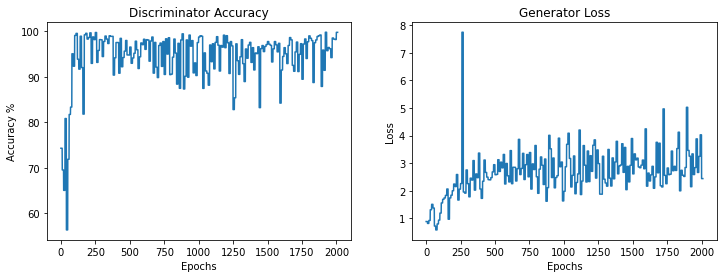

2001 [D loss: 0.272679, acc.: 85.94%] [G loss: 3.574472]
2002 [D loss: 0.050599, acc.: 97.07%] [G loss: 4.683887]
2003 [D loss: 0.292252, acc.: 91.99%] [G loss: 2.696227]
2004 [D loss: 0.029860, acc.: 99.41%] [G loss: 2.103758]
2005 [D loss: 1.851592, acc.: 49.80%] [G loss: 3.771073]
2006 [D loss: 0.497764, acc.: 85.16%] [G loss: 2.208220]
2007 [D loss: 0.160479, acc.: 94.53%] [G loss: 1.525707]
2008 [D loss: 0.102336, acc.: 99.02%] [G loss: 2.002986]
2009 [D loss: 0.038283, acc.: 99.22%] [G loss: 2.068333]
2010 [D loss: 0.049900, acc.: 99.02%] [G loss: 2.101903]
2011 [D loss: 0.047751, acc.: 98.83%] [G loss: 1.878685]
2012 [D loss: 0.056437, acc.: 98.44%] [G loss: 2.104011]
2013 [D loss: 0.045180, acc.: 99.41%] [G loss: 2.096272]
2014 [D loss: 0.040956, acc.: 99.61%] [G loss: 2.413859]
2015 [D loss: 0.072355, acc.: 97.85%] [G loss: 2.550725]
2016 [D loss: 0.061458, acc.: 98.63%] [G loss: 2.473241]
2017 [D loss: 0.115527, acc.: 98.24%] [G loss: 3.065594]
2018 [D loss: 0.112511, acc.: 9

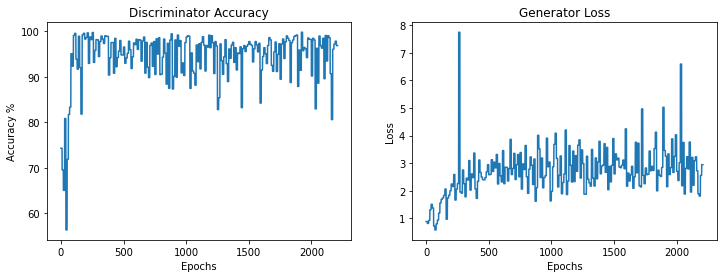

2201 [D loss: 0.041028, acc.: 99.22%] [G loss: 2.866169]
2202 [D loss: 0.193217, acc.: 95.12%] [G loss: 5.984811]
2203 [D loss: 0.384502, acc.: 90.82%] [G loss: 2.657938]
2204 [D loss: 0.109038, acc.: 99.22%] [G loss: 2.528934]
2205 [D loss: 0.037811, acc.: 99.22%] [G loss: 2.370322]
2206 [D loss: 0.081163, acc.: 97.85%] [G loss: 2.087070]
2207 [D loss: 0.061176, acc.: 99.41%] [G loss: 2.346449]
2208 [D loss: 0.073283, acc.: 97.46%] [G loss: 2.133848]
2209 [D loss: 0.055474, acc.: 99.02%] [G loss: 2.320047]
2210 [D loss: 0.095172, acc.: 98.05%] [G loss: 2.844296]
2211 [D loss: 0.048184, acc.: 99.22%] [G loss: 2.637108]
2212 [D loss: 0.095577, acc.: 97.27%] [G loss: 3.436706]
2213 [D loss: 0.027490, acc.: 99.02%] [G loss: 3.332530]
2214 [D loss: 0.158243, acc.: 95.12%] [G loss: 5.613342]
2215 [D loss: 0.177283, acc.: 95.12%] [G loss: 3.222633]
2216 [D loss: 0.111202, acc.: 96.88%] [G loss: 1.878833]
2217 [D loss: 0.124664, acc.: 97.46%] [G loss: 2.350941]
2218 [D loss: 0.046752, acc.: 9

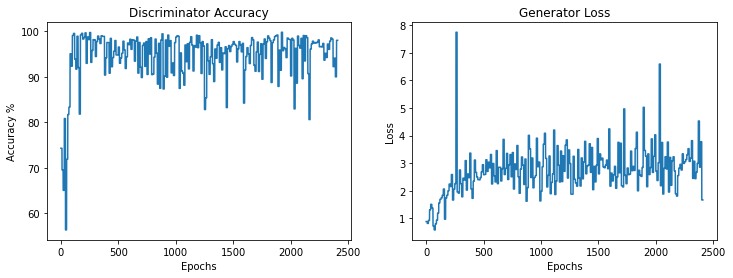

2401 [D loss: 0.072485, acc.: 98.05%] [G loss: 1.611221]
2402 [D loss: 0.078566, acc.: 97.27%] [G loss: 1.731290]
2403 [D loss: 0.041888, acc.: 99.22%] [G loss: 1.705916]
2404 [D loss: 0.062472, acc.: 97.85%] [G loss: 1.799249]
2405 [D loss: 0.040282, acc.: 99.61%] [G loss: 1.890897]
2406 [D loss: 0.049274, acc.: 99.41%] [G loss: 1.862265]
2407 [D loss: 0.063446, acc.: 99.02%] [G loss: 1.951550]
2408 [D loss: 0.067762, acc.: 98.83%] [G loss: 2.139105]
2409 [D loss: 0.068324, acc.: 98.83%] [G loss: 2.390509]
2410 [D loss: 0.089314, acc.: 97.27%] [G loss: 2.325216]
2411 [D loss: 0.074778, acc.: 97.07%] [G loss: 2.759273]
2412 [D loss: 0.075383, acc.: 98.05%] [G loss: 3.019021]
2413 [D loss: 0.034161, acc.: 98.83%] [G loss: 3.029414]
2414 [D loss: 0.231424, acc.: 90.04%] [G loss: 8.398296]
2415 [D loss: 0.305511, acc.: 93.95%] [G loss: 4.044317]
2416 [D loss: 0.754891, acc.: 57.81%] [G loss: 5.393332]
2417 [D loss: 0.373705, acc.: 90.62%] [G loss: 4.272370]
2418 [D loss: 0.249766, acc.: 9

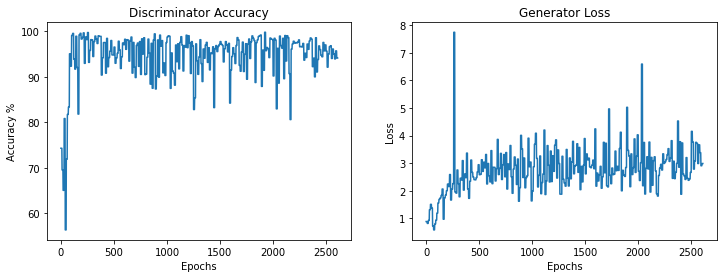

2601 [D loss: 0.175142, acc.: 93.36%] [G loss: 2.724044]
2602 [D loss: 0.232981, acc.: 88.28%] [G loss: 4.289869]
2603 [D loss: 0.182587, acc.: 93.55%] [G loss: 3.156466]
2604 [D loss: 0.057070, acc.: 99.22%] [G loss: 2.217383]
2605 [D loss: 0.108074, acc.: 97.66%] [G loss: 2.927666]
2606 [D loss: 0.090436, acc.: 96.88%] [G loss: 2.776561]
2607 [D loss: 0.213519, acc.: 92.97%] [G loss: 3.600124]
2608 [D loss: 0.099131, acc.: 96.68%] [G loss: 2.782184]
2609 [D loss: 0.057565, acc.: 98.83%] [G loss: 2.854946]
2610 [D loss: 0.064749, acc.: 99.02%] [G loss: 3.157548]
2611 [D loss: 0.057515, acc.: 99.41%] [G loss: 3.387185]
2612 [D loss: 0.056590, acc.: 98.63%] [G loss: 2.981779]
2613 [D loss: 0.068024, acc.: 98.83%] [G loss: 3.256848]
2614 [D loss: 0.121626, acc.: 95.51%] [G loss: 3.449460]
2615 [D loss: 0.190901, acc.: 93.55%] [G loss: 4.692614]
2616 [D loss: 0.264274, acc.: 92.58%] [G loss: 2.515624]
2617 [D loss: 0.398454, acc.: 82.03%] [G loss: 5.150533]
2618 [D loss: 0.403694, acc.: 8

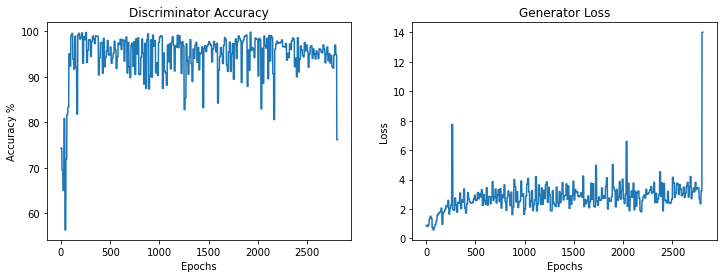

2801 [D loss: 0.849786, acc.: 86.52%] [G loss: 2.477321]
2802 [D loss: 0.248145, acc.: 88.67%] [G loss: 4.176321]
2803 [D loss: 0.463540, acc.: 85.55%] [G loss: 2.293957]
2804 [D loss: 0.122100, acc.: 96.88%] [G loss: 3.247284]
2805 [D loss: 0.050743, acc.: 98.44%] [G loss: 3.257934]
2806 [D loss: 0.146237, acc.: 95.31%] [G loss: 2.713786]
2807 [D loss: 0.094297, acc.: 97.85%] [G loss: 3.471548]
2808 [D loss: 0.141863, acc.: 94.14%] [G loss: 3.567564]
2809 [D loss: 0.231853, acc.: 92.38%] [G loss: 3.939517]
2810 [D loss: 0.070208, acc.: 98.05%] [G loss: 3.857275]
2811 [D loss: 0.188870, acc.: 93.16%] [G loss: 3.343895]
2812 [D loss: 0.185987, acc.: 94.14%] [G loss: 2.612448]
2813 [D loss: 0.146796, acc.: 97.46%] [G loss: 2.774765]
2814 [D loss: 0.091115, acc.: 97.85%] [G loss: 2.525738]
2815 [D loss: 0.190703, acc.: 94.53%] [G loss: 2.559470]
2816 [D loss: 0.144879, acc.: 95.90%] [G loss: 2.362295]
2817 [D loss: 0.250023, acc.: 92.77%] [G loss: 4.131700]
2818 [D loss: 0.324015, acc.: 8

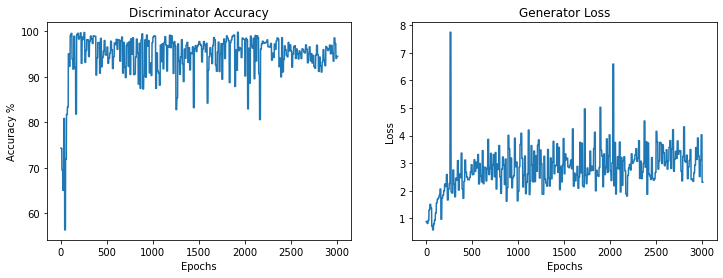

3001 [D loss: 0.088179, acc.: 97.66%] [G loss: 3.033031]
3002 [D loss: 0.078187, acc.: 97.27%] [G loss: 2.911616]
3003 [D loss: 0.270466, acc.: 87.11%] [G loss: 7.085391]
3004 [D loss: 0.658646, acc.: 86.33%] [G loss: 2.617605]
3005 [D loss: 0.357301, acc.: 89.84%] [G loss: 3.406832]
3006 [D loss: 0.268895, acc.: 85.55%] [G loss: 3.763684]
3007 [D loss: 0.258659, acc.: 93.36%] [G loss: 2.384744]
3008 [D loss: 0.096235, acc.: 96.88%] [G loss: 2.531172]
3009 [D loss: 0.099050, acc.: 96.48%] [G loss: 2.005625]
3010 [D loss: 0.046047, acc.: 98.83%] [G loss: 2.387974]
3011 [D loss: 0.058620, acc.: 98.44%] [G loss: 2.244079]
3012 [D loss: 0.072500, acc.: 98.05%] [G loss: 1.975377]
3013 [D loss: 0.103341, acc.: 98.44%] [G loss: 2.439183]
3014 [D loss: 0.081361, acc.: 96.88%] [G loss: 2.214260]
3015 [D loss: 0.156506, acc.: 95.12%] [G loss: 3.032384]
3016 [D loss: 0.132040, acc.: 95.12%] [G loss: 2.615611]
3017 [D loss: 0.086114, acc.: 97.46%] [G loss: 2.643156]
3018 [D loss: 0.060881, acc.: 9

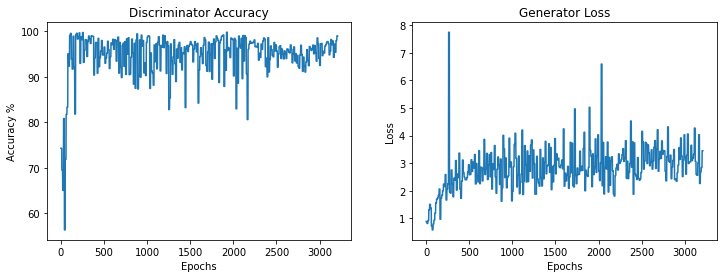

3201 [D loss: 0.119640, acc.: 96.88%] [G loss: 3.290088]
3202 [D loss: 0.058442, acc.: 98.63%] [G loss: 2.306327]
3203 [D loss: 0.046553, acc.: 98.83%] [G loss: 2.616446]
3204 [D loss: 0.066477, acc.: 98.05%] [G loss: 2.807935]
3205 [D loss: 0.096837, acc.: 97.07%] [G loss: 2.967536]
3206 [D loss: 0.050235, acc.: 98.44%] [G loss: 3.177953]
3207 [D loss: 0.185297, acc.: 94.34%] [G loss: 5.780179]
3208 [D loss: 0.346115, acc.: 91.41%] [G loss: 3.943235]
3209 [D loss: 0.200114, acc.: 93.95%] [G loss: 3.539709]
3210 [D loss: 0.009298, acc.: 100.00%] [G loss: 3.638937]
3211 [D loss: 0.025708, acc.: 99.22%] [G loss: 2.565052]
3212 [D loss: 0.101403, acc.: 96.68%] [G loss: 4.310726]
3213 [D loss: 0.203862, acc.: 95.12%] [G loss: 4.376091]
3214 [D loss: 0.152219, acc.: 96.29%] [G loss: 3.117788]
3215 [D loss: 0.188113, acc.: 92.97%] [G loss: 3.103528]
3216 [D loss: 0.050248, acc.: 97.85%] [G loss: 2.579936]
3217 [D loss: 0.038185, acc.: 99.80%] [G loss: 3.243783]
3218 [D loss: 0.030082, acc.: 

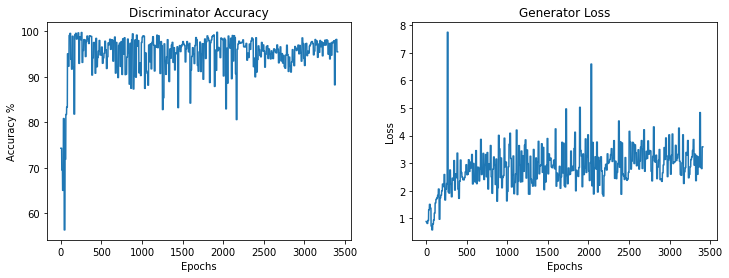

3401 [D loss: 0.069268, acc.: 98.24%] [G loss: 2.716980]
3402 [D loss: 0.083944, acc.: 97.85%] [G loss: 2.386287]
3403 [D loss: 0.031774, acc.: 99.41%] [G loss: 2.520947]
3404 [D loss: 0.044028, acc.: 99.02%] [G loss: 2.651450]
3405 [D loss: 0.068236, acc.: 98.05%] [G loss: 2.824265]
3406 [D loss: 0.133239, acc.: 95.70%] [G loss: 3.736917]
3407 [D loss: 0.128711, acc.: 96.29%] [G loss: 3.358350]
3408 [D loss: 0.073907, acc.: 98.05%] [G loss: 2.829195]
3409 [D loss: 0.075478, acc.: 98.05%] [G loss: 2.360096]
3410 [D loss: 0.050286, acc.: 99.02%] [G loss: 2.739511]
3411 [D loss: 0.062430, acc.: 97.66%] [G loss: 2.683295]
3412 [D loss: 0.059588, acc.: 97.07%] [G loss: 2.721035]
3413 [D loss: 0.052078, acc.: 98.44%] [G loss: 3.734387]
3414 [D loss: 0.072909, acc.: 97.66%] [G loss: 3.265379]
3415 [D loss: 0.058684, acc.: 97.85%] [G loss: 3.256914]
3416 [D loss: 0.033350, acc.: 98.83%] [G loss: 2.747350]
3417 [D loss: 0.048619, acc.: 99.02%] [G loss: 2.851382]
3418 [D loss: 0.037995, acc.: 9

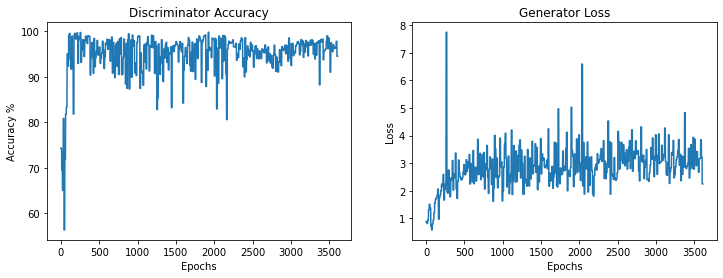

3601 [D loss: 0.106388, acc.: 97.85%] [G loss: 3.250023]
3602 [D loss: 0.079101, acc.: 96.48%] [G loss: 2.560753]
3603 [D loss: 0.078675, acc.: 98.83%] [G loss: 3.655749]
3604 [D loss: 0.099689, acc.: 96.68%] [G loss: 2.695971]
3605 [D loss: 0.090601, acc.: 98.63%] [G loss: 3.084181]
3606 [D loss: 0.145034, acc.: 95.90%] [G loss: 2.851971]
3607 [D loss: 0.039261, acc.: 99.22%] [G loss: 2.770879]
3608 [D loss: 0.118753, acc.: 97.27%] [G loss: 3.989660]
3609 [D loss: 0.160480, acc.: 95.51%] [G loss: 2.815482]
3610 [D loss: 0.154440, acc.: 96.48%] [G loss: 2.570886]
3611 [D loss: 0.047764, acc.: 98.05%] [G loss: 2.731952]
3612 [D loss: 0.047192, acc.: 99.02%] [G loss: 2.721265]
3613 [D loss: 0.032065, acc.: 100.00%] [G loss: 2.496893]
3614 [D loss: 0.043897, acc.: 99.22%] [G loss: 2.757651]
3615 [D loss: 0.056115, acc.: 98.83%] [G loss: 2.671533]
3616 [D loss: 0.079515, acc.: 98.05%] [G loss: 3.173301]
3617 [D loss: 0.061231, acc.: 97.66%] [G loss: 2.845189]
3618 [D loss: 0.088172, acc.: 

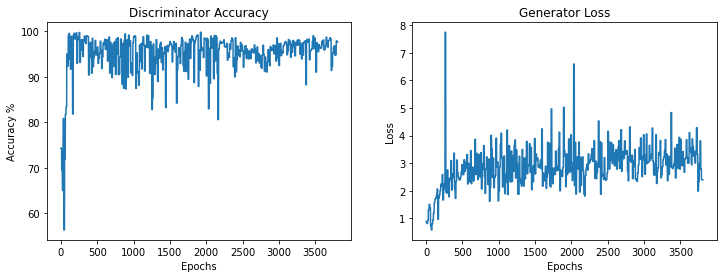

3801 [D loss: 0.044755, acc.: 98.63%] [G loss: 2.560498]
3802 [D loss: 0.063340, acc.: 98.44%] [G loss: 2.909448]
3803 [D loss: 0.095466, acc.: 96.68%] [G loss: 2.772188]
3804 [D loss: 0.078771, acc.: 97.66%] [G loss: 3.671452]
3805 [D loss: 0.053108, acc.: 98.44%] [G loss: 2.594221]
3806 [D loss: 0.066693, acc.: 99.02%] [G loss: 3.442007]
3807 [D loss: 0.110856, acc.: 94.92%] [G loss: 2.835609]
3808 [D loss: 0.101658, acc.: 97.27%] [G loss: 4.151468]
3809 [D loss: 0.175187, acc.: 95.12%] [G loss: 3.967987]
3810 [D loss: 0.056078, acc.: 97.85%] [G loss: 2.873887]
3811 [D loss: 0.036628, acc.: 99.41%] [G loss: 2.814095]
3812 [D loss: 0.078111, acc.: 97.85%] [G loss: 4.081958]
3813 [D loss: 0.261843, acc.: 90.04%] [G loss: 3.660632]
3814 [D loss: 0.131226, acc.: 94.92%] [G loss: 3.958063]
3815 [D loss: 0.142290, acc.: 95.70%] [G loss: 3.755465]
3816 [D loss: 0.195786, acc.: 91.21%] [G loss: 8.881259]
3817 [D loss: 0.809255, acc.: 83.98%] [G loss: 3.210608]
3818 [D loss: 0.094268, acc.: 9

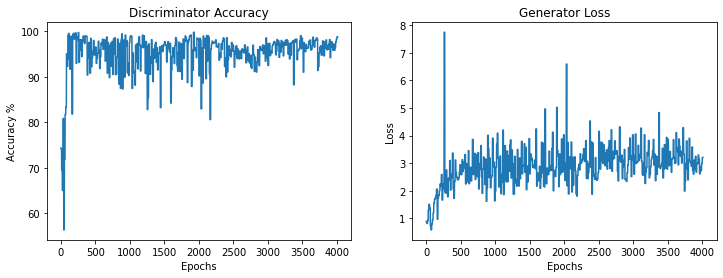

4001 [D loss: 0.025345, acc.: 99.41%] [G loss: 3.155591]
4002 [D loss: 0.050771, acc.: 99.02%] [G loss: 2.870036]
4003 [D loss: 0.036193, acc.: 99.41%] [G loss: 3.168119]
4004 [D loss: 0.067408, acc.: 98.83%] [G loss: 3.882132]
4005 [D loss: 0.026135, acc.: 99.61%] [G loss: 3.525646]
4006 [D loss: 0.312475, acc.: 87.70%] [G loss: 6.248684]
4007 [D loss: 0.262240, acc.: 93.75%] [G loss: 4.147009]
4008 [D loss: 0.170733, acc.: 95.90%] [G loss: 3.993893]
4009 [D loss: 0.083642, acc.: 96.29%] [G loss: 3.226560]
4010 [D loss: 0.130684, acc.: 96.48%] [G loss: 3.808825]
4011 [D loss: 0.046270, acc.: 99.02%] [G loss: 3.251207]
4012 [D loss: 0.064570, acc.: 98.24%] [G loss: 3.103407]
4013 [D loss: 0.044193, acc.: 99.22%] [G loss: 2.733437]
4014 [D loss: 0.049839, acc.: 98.63%] [G loss: 2.721711]
4015 [D loss: 0.054281, acc.: 98.24%] [G loss: 2.637725]
4016 [D loss: 0.055046, acc.: 97.85%] [G loss: 3.406241]
4017 [D loss: 0.037829, acc.: 98.05%] [G loss: 3.175554]
4018 [D loss: 0.069221, acc.: 9

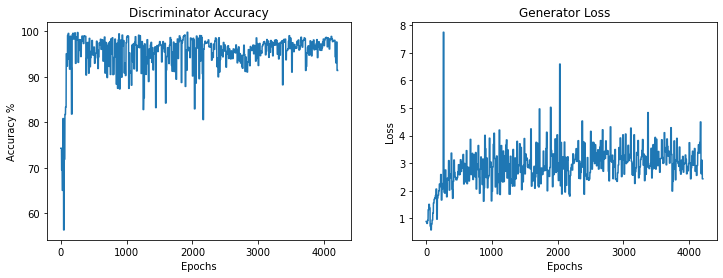

4201 [D loss: 0.035744, acc.: 98.83%] [G loss: 2.566944]
4202 [D loss: 0.048232, acc.: 97.66%] [G loss: 2.237941]
4203 [D loss: 0.059913, acc.: 98.83%] [G loss: 2.629736]
4204 [D loss: 0.048049, acc.: 98.44%] [G loss: 2.407782]
4205 [D loss: 0.038361, acc.: 99.41%] [G loss: 2.739479]
4206 [D loss: 0.039705, acc.: 99.22%] [G loss: 2.272827]
4207 [D loss: 0.108300, acc.: 96.29%] [G loss: 3.933789]
4208 [D loss: 0.167133, acc.: 96.09%] [G loss: 2.299529]
4209 [D loss: 0.110345, acc.: 97.46%] [G loss: 3.399573]
4210 [D loss: 0.117243, acc.: 97.27%] [G loss: 3.252284]
4211 [D loss: 0.073600, acc.: 98.05%] [G loss: 2.252140]
4212 [D loss: 0.129979, acc.: 93.55%] [G loss: 2.522900]
4213 [D loss: 0.064246, acc.: 98.24%] [G loss: 2.193386]
4214 [D loss: 0.106221, acc.: 97.46%] [G loss: 2.151353]
4215 [D loss: 0.035007, acc.: 99.22%] [G loss: 2.173909]
4216 [D loss: 0.029519, acc.: 99.61%] [G loss: 2.262630]
4217 [D loss: 0.066262, acc.: 98.24%] [G loss: 2.852885]
4218 [D loss: 0.076782, acc.: 9

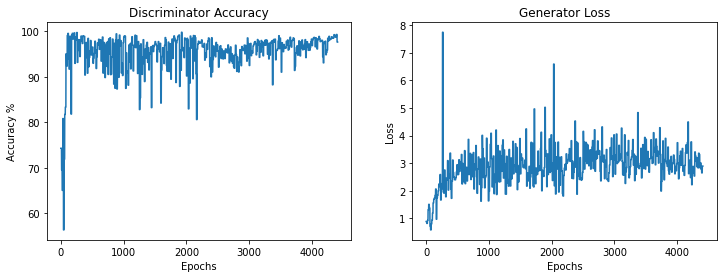

4401 [D loss: 0.087569, acc.: 97.46%] [G loss: 2.341265]
4402 [D loss: 0.011718, acc.: 99.80%] [G loss: 2.949455]
4403 [D loss: 0.094026, acc.: 98.24%] [G loss: 2.393289]
4404 [D loss: 0.015550, acc.: 99.80%] [G loss: 2.660290]
4405 [D loss: 0.023292, acc.: 99.80%] [G loss: 2.520611]
4406 [D loss: 0.049113, acc.: 99.22%] [G loss: 2.596889]
4407 [D loss: 0.021024, acc.: 99.61%] [G loss: 2.487311]
4408 [D loss: 0.018474, acc.: 99.80%] [G loss: 3.047968]
4409 [D loss: 0.026854, acc.: 99.61%] [G loss: 2.868813]
4410 [D loss: 0.052446, acc.: 99.22%] [G loss: 2.854122]
4411 [D loss: 0.038019, acc.: 99.22%] [G loss: 3.629383]
4412 [D loss: 0.037426, acc.: 99.02%] [G loss: 3.358323]
4413 [D loss: 0.057663, acc.: 99.02%] [G loss: 7.570291]
4414 [D loss: 0.092806, acc.: 96.68%] [G loss: 6.625924]
4415 [D loss: 0.052151, acc.: 97.85%] [G loss: 6.033918]
4416 [D loss: 0.133186, acc.: 96.88%] [G loss: 3.874138]
4417 [D loss: 0.064095, acc.: 97.46%] [G loss: 4.683612]
4418 [D loss: 0.150653, acc.: 9

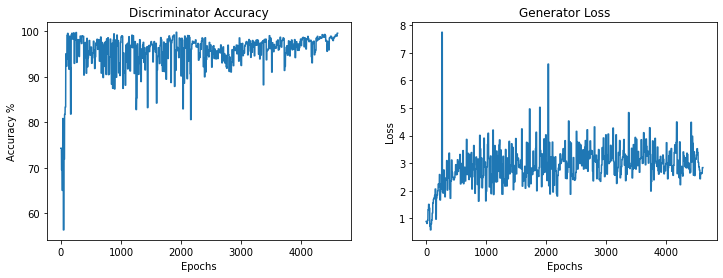

4601 [D loss: 0.028534, acc.: 99.41%] [G loss: 2.831252]
4602 [D loss: 0.080337, acc.: 97.46%] [G loss: 2.722596]
4603 [D loss: 0.023890, acc.: 99.61%] [G loss: 2.938205]
4604 [D loss: 0.037944, acc.: 99.22%] [G loss: 2.661033]
4605 [D loss: 0.015211, acc.: 99.80%] [G loss: 2.854036]
4606 [D loss: 0.038820, acc.: 99.41%] [G loss: 2.428325]
4607 [D loss: 0.040542, acc.: 99.02%] [G loss: 2.562808]
4608 [D loss: 0.047900, acc.: 99.22%] [G loss: 2.755754]
4609 [D loss: 0.054007, acc.: 99.22%] [G loss: 2.862697]
4610 [D loss: 0.053544, acc.: 98.83%] [G loss: 2.622580]
4611 [D loss: 0.011224, acc.: 99.80%] [G loss: 2.799026]
4612 [D loss: 0.036896, acc.: 99.41%] [G loss: 2.497901]
4613 [D loss: 0.029761, acc.: 99.61%] [G loss: 2.643027]
4614 [D loss: 0.064500, acc.: 98.63%] [G loss: 2.387480]
4615 [D loss: 0.041621, acc.: 99.22%] [G loss: 2.551420]
4616 [D loss: 0.020590, acc.: 99.61%] [G loss: 2.472201]
4617 [D loss: 0.036479, acc.: 99.22%] [G loss: 2.624238]
4618 [D loss: 0.027656, acc.: 9

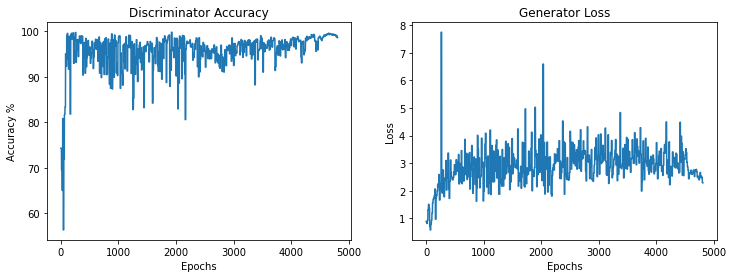

4801 [D loss: 0.113811, acc.: 98.05%] [G loss: 2.356068]
4802 [D loss: 0.034250, acc.: 99.41%] [G loss: 2.382414]
4803 [D loss: 0.051352, acc.: 98.83%] [G loss: 2.251397]
4804 [D loss: 0.054835, acc.: 98.63%] [G loss: 2.487364]
4805 [D loss: 0.061004, acc.: 98.63%] [G loss: 2.369951]
4806 [D loss: 0.031493, acc.: 99.41%] [G loss: 2.340485]
4807 [D loss: 0.037948, acc.: 99.22%] [G loss: 2.515934]
4808 [D loss: 0.027062, acc.: 99.41%] [G loss: 2.695505]
4809 [D loss: 0.036532, acc.: 99.41%] [G loss: 2.617229]
4810 [D loss: 0.048649, acc.: 99.22%] [G loss: 2.455602]
4811 [D loss: 0.026156, acc.: 99.61%] [G loss: 2.329050]
4812 [D loss: 0.056538, acc.: 98.83%] [G loss: 2.154771]
4813 [D loss: 0.080661, acc.: 98.44%] [G loss: 2.247941]
4814 [D loss: 0.072013, acc.: 98.44%] [G loss: 2.293076]
4815 [D loss: 0.024029, acc.: 99.61%] [G loss: 2.018415]
4816 [D loss: 0.058129, acc.: 98.83%] [G loss: 2.456882]
4817 [D loss: 0.042370, acc.: 99.22%] [G loss: 2.350659]
4818 [D loss: 0.034050, acc.: 9

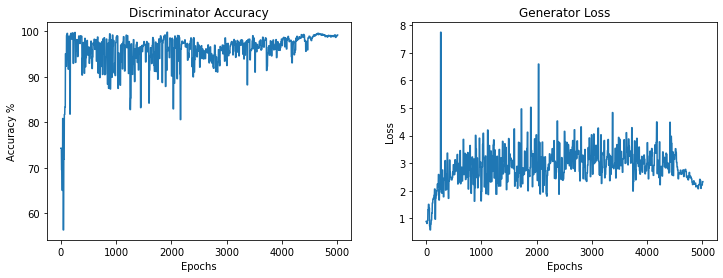

5001 [D loss: 0.041689, acc.: 99.22%] [G loss: 2.203103]
5002 [D loss: 0.046856, acc.: 99.02%] [G loss: 2.103780]
5003 [D loss: 0.038479, acc.: 99.22%] [G loss: 2.443034]
5004 [D loss: 0.037616, acc.: 99.22%] [G loss: 2.622223]
5005 [D loss: 0.052698, acc.: 99.02%] [G loss: 2.539781]
5006 [D loss: 0.037715, acc.: 99.22%] [G loss: 2.487914]
5007 [D loss: 0.043175, acc.: 99.22%] [G loss: 2.308677]
5008 [D loss: 0.049219, acc.: 99.02%] [G loss: 2.211352]
5009 [D loss: 0.038040, acc.: 99.22%] [G loss: 2.562341]
5010 [D loss: 0.045216, acc.: 99.22%] [G loss: 2.237964]
5011 [D loss: 0.038955, acc.: 99.22%] [G loss: 2.250029]
5012 [D loss: 0.035413, acc.: 99.22%] [G loss: 2.304866]
5013 [D loss: 0.025361, acc.: 99.61%] [G loss: 2.270754]
5014 [D loss: 0.080054, acc.: 98.44%] [G loss: 1.918325]
5015 [D loss: 0.061209, acc.: 98.83%] [G loss: 2.134474]
5016 [D loss: 0.057385, acc.: 98.83%] [G loss: 1.926858]
5017 [D loss: 0.102813, acc.: 97.66%] [G loss: 1.969395]
5018 [D loss: 0.071502, acc.: 9

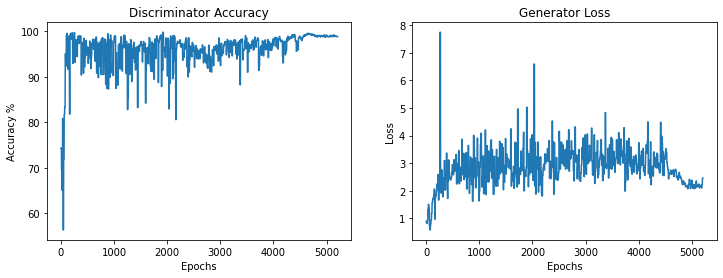

5201 [D loss: 0.050668, acc.: 99.02%] [G loss: 2.209227]
5202 [D loss: 0.059963, acc.: 98.63%] [G loss: 2.539017]
5203 [D loss: 0.026826, acc.: 99.61%] [G loss: 1.976909]
5204 [D loss: 0.089449, acc.: 98.24%] [G loss: 2.260189]
5205 [D loss: 0.033241, acc.: 99.41%] [G loss: 2.234061]
5206 [D loss: 0.081459, acc.: 98.24%] [G loss: 2.104121]
5207 [D loss: 0.029383, acc.: 99.41%] [G loss: 2.597205]
5208 [D loss: 0.051458, acc.: 99.02%] [G loss: 2.253898]
5209 [D loss: 0.042826, acc.: 99.22%] [G loss: 2.200442]
5210 [D loss: 0.014309, acc.: 99.80%] [G loss: 2.283476]
5211 [D loss: 0.064371, acc.: 98.63%] [G loss: 2.171724]
5212 [D loss: 0.048142, acc.: 99.02%] [G loss: 2.236916]
5213 [D loss: 0.073433, acc.: 98.44%] [G loss: 2.249025]
5214 [D loss: 0.058642, acc.: 98.83%] [G loss: 2.010658]
5215 [D loss: 0.032670, acc.: 99.41%] [G loss: 2.233965]
5216 [D loss: 0.047992, acc.: 99.02%] [G loss: 2.371981]
5217 [D loss: 0.042720, acc.: 99.02%] [G loss: 2.110612]
5218 [D loss: 0.056522, acc.: 9

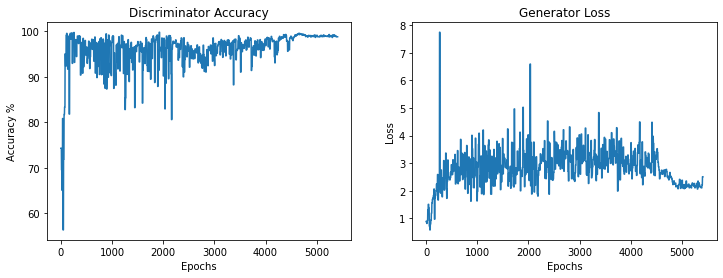

5401 [D loss: 0.047831, acc.: 99.02%] [G loss: 2.298177]
5402 [D loss: 0.042954, acc.: 99.22%] [G loss: 2.251425]
5403 [D loss: 0.026989, acc.: 99.61%] [G loss: 2.248747]
5404 [D loss: 0.031593, acc.: 99.41%] [G loss: 2.353449]
5405 [D loss: 0.038382, acc.: 99.22%] [G loss: 2.324321]
5406 [D loss: 0.024046, acc.: 99.61%] [G loss: 2.588081]
5407 [D loss: 0.060138, acc.: 98.83%] [G loss: 2.212539]
5408 [D loss: 0.057478, acc.: 98.83%] [G loss: 2.138695]
5409 [D loss: 0.033143, acc.: 99.41%] [G loss: 2.098270]
5410 [D loss: 0.048426, acc.: 99.02%] [G loss: 2.143923]
5411 [D loss: 0.075383, acc.: 98.44%] [G loss: 2.474372]
5412 [D loss: 0.054666, acc.: 98.83%] [G loss: 2.109825]
5413 [D loss: 0.073386, acc.: 98.63%] [G loss: 1.814491]
5414 [D loss: 0.023182, acc.: 99.61%] [G loss: 2.331365]
5415 [D loss: 0.029711, acc.: 99.41%] [G loss: 2.480600]
5416 [D loss: 0.007705, acc.: 100.00%] [G loss: 2.350777]
5417 [D loss: 0.066576, acc.: 98.63%] [G loss: 2.538628]
5418 [D loss: 0.040248, acc.: 

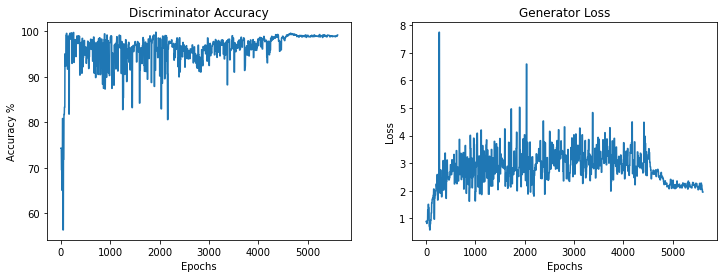

5601 [D loss: 0.009536, acc.: 100.00%] [G loss: 2.429185]
5602 [D loss: 0.053126, acc.: 99.02%] [G loss: 2.273172]
5603 [D loss: 0.037239, acc.: 99.22%] [G loss: 2.522714]
5604 [D loss: 0.047665, acc.: 99.02%] [G loss: 2.347681]
5605 [D loss: 0.039604, acc.: 99.22%] [G loss: 2.316536]
5606 [D loss: 0.065903, acc.: 98.63%] [G loss: 2.257850]
5607 [D loss: 0.074845, acc.: 98.44%] [G loss: 1.803397]
5608 [D loss: 0.032240, acc.: 99.41%] [G loss: 2.144624]
5609 [D loss: 0.070857, acc.: 98.44%] [G loss: 1.875748]
5610 [D loss: 0.034828, acc.: 99.41%] [G loss: 2.161115]
5611 [D loss: 0.055948, acc.: 98.83%] [G loss: 2.127158]
5612 [D loss: 0.040074, acc.: 99.22%] [G loss: 2.146376]
5613 [D loss: 0.040346, acc.: 99.22%] [G loss: 2.246432]
5614 [D loss: 0.056986, acc.: 98.83%] [G loss: 1.887033]
5615 [D loss: 0.049708, acc.: 99.02%] [G loss: 2.046049]
5616 [D loss: 0.032993, acc.: 99.41%] [G loss: 2.145307]
5617 [D loss: 0.066470, acc.: 98.63%] [G loss: 2.208894]
5618 [D loss: 0.048513, acc.: 

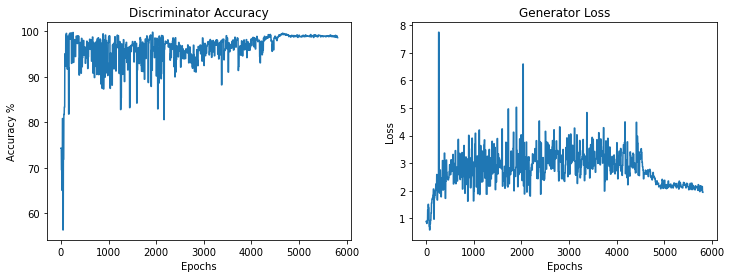

5801 [D loss: 0.049651, acc.: 99.02%] [G loss: 2.424815]
5802 [D loss: 0.056385, acc.: 98.83%] [G loss: 1.946586]
5803 [D loss: 0.024918, acc.: 99.61%] [G loss: 2.061607]
5804 [D loss: 0.014363, acc.: 99.80%] [G loss: 2.460345]
5805 [D loss: 0.060988, acc.: 98.83%] [G loss: 2.075476]
5806 [D loss: 0.031700, acc.: 99.41%] [G loss: 2.359413]
5807 [D loss: 0.041614, acc.: 99.22%] [G loss: 2.155048]
5808 [D loss: 0.059291, acc.: 98.83%] [G loss: 2.151968]
5809 [D loss: 0.043868, acc.: 99.22%] [G loss: 1.948507]
5810 [D loss: 0.041572, acc.: 99.22%] [G loss: 2.487955]
5811 [D loss: 0.059026, acc.: 98.83%] [G loss: 2.085862]
5812 [D loss: 0.063163, acc.: 98.63%] [G loss: 1.921907]
5813 [D loss: 0.018289, acc.: 99.80%] [G loss: 2.196439]
5814 [D loss: 0.067850, acc.: 98.63%] [G loss: 2.028381]
5815 [D loss: 0.057011, acc.: 98.83%] [G loss: 2.205307]
5816 [D loss: 0.025474, acc.: 99.61%] [G loss: 2.033424]
5817 [D loss: 0.069009, acc.: 98.63%] [G loss: 2.257713]
5818 [D loss: 0.049674, acc.: 9

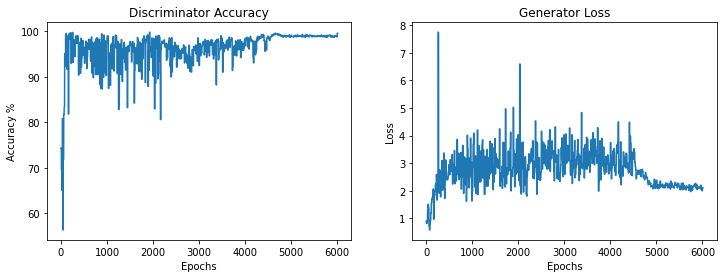

6001 [D loss: 0.030937, acc.: 99.41%] [G loss: 2.116436]
6002 [D loss: 0.058420, acc.: 98.83%] [G loss: 2.406600]
6003 [D loss: 0.060215, acc.: 98.83%] [G loss: 2.354166]
6004 [D loss: 0.060092, acc.: 98.83%] [G loss: 1.845135]
6005 [D loss: 0.055884, acc.: 98.83%] [G loss: 1.892494]
6006 [D loss: 0.069939, acc.: 98.44%] [G loss: 2.170119]
6007 [D loss: 0.083667, acc.: 98.24%] [G loss: 1.790568]
6008 [D loss: 0.031825, acc.: 99.41%] [G loss: 1.955520]
6009 [D loss: 0.055934, acc.: 98.83%] [G loss: 2.161606]
6010 [D loss: 0.042654, acc.: 99.22%] [G loss: 2.052269]
6011 [D loss: 0.025130, acc.: 99.61%] [G loss: 2.095488]
6012 [D loss: 0.047191, acc.: 99.02%] [G loss: 2.247833]
6013 [D loss: 0.057067, acc.: 98.83%] [G loss: 2.042947]
6014 [D loss: 0.066143, acc.: 98.63%] [G loss: 2.056429]
6015 [D loss: 0.074818, acc.: 98.44%] [G loss: 1.933739]
6016 [D loss: 0.057320, acc.: 98.83%] [G loss: 2.078212]
6017 [D loss: 0.034652, acc.: 99.41%] [G loss: 2.078622]
6018 [D loss: 0.042675, acc.: 9

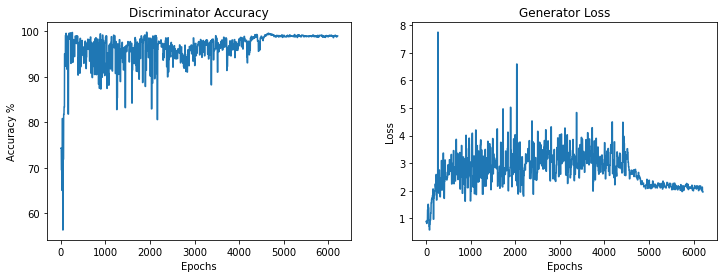

6201 [D loss: 0.064363, acc.: 98.63%] [G loss: 2.257340]
6202 [D loss: 0.059273, acc.: 98.83%] [G loss: 2.060396]
6203 [D loss: 0.038992, acc.: 99.22%] [G loss: 2.479900]
6204 [D loss: 0.029919, acc.: 99.41%] [G loss: 2.719409]
6205 [D loss: 0.025870, acc.: 99.61%] [G loss: 2.233425]
6206 [D loss: 0.052619, acc.: 99.02%] [G loss: 2.162680]
6207 [D loss: 0.066915, acc.: 98.63%] [G loss: 1.831508]
6208 [D loss: 0.056502, acc.: 98.83%] [G loss: 2.170077]
6209 [D loss: 0.049479, acc.: 99.02%] [G loss: 1.842504]
6210 [D loss: 0.074036, acc.: 98.44%] [G loss: 1.902075]
6211 [D loss: 0.040616, acc.: 99.22%] [G loss: 1.900897]
6212 [D loss: 0.044931, acc.: 99.02%] [G loss: 2.090954]
6213 [D loss: 0.073790, acc.: 98.44%] [G loss: 2.095478]
6214 [D loss: 0.025842, acc.: 99.61%] [G loss: 1.880985]
6215 [D loss: 0.047212, acc.: 99.02%] [G loss: 2.149587]
6216 [D loss: 0.051764, acc.: 99.02%] [G loss: 2.048506]
6217 [D loss: 0.040614, acc.: 99.22%] [G loss: 2.241120]
6218 [D loss: 0.073624, acc.: 9

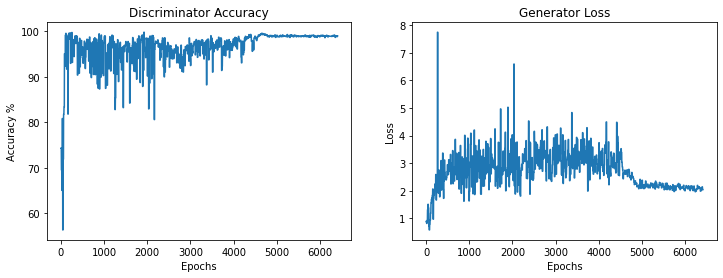

6401 [D loss: 0.064978, acc.: 98.63%] [G loss: 1.962632]
6402 [D loss: 0.064559, acc.: 98.63%] [G loss: 1.817415]
6403 [D loss: 0.024544, acc.: 99.61%] [G loss: 1.997123]
6404 [D loss: 0.048942, acc.: 99.02%] [G loss: 2.278531]
6405 [D loss: 0.049529, acc.: 99.02%] [G loss: 2.287180]
6406 [D loss: 0.069992, acc.: 98.63%] [G loss: 2.093214]
6407 [D loss: 0.041700, acc.: 99.22%] [G loss: 2.101488]
6408 [D loss: 0.033500, acc.: 99.41%] [G loss: 2.150109]
6409 [D loss: 0.041758, acc.: 99.22%] [G loss: 2.294845]
6410 [D loss: 0.069021, acc.: 98.63%] [G loss: 2.089631]
6411 [D loss: 0.078757, acc.: 98.44%] [G loss: 1.826167]
6412 [D loss: 0.035531, acc.: 99.41%] [G loss: 1.739386]
6413 [D loss: 0.042159, acc.: 99.22%] [G loss: 1.830454]
6414 [D loss: 0.032367, acc.: 99.41%] [G loss: 2.435060]
6415 [D loss: 0.039815, acc.: 99.22%] [G loss: 2.041023]
6416 [D loss: 0.051647, acc.: 99.02%] [G loss: 2.154920]
6417 [D loss: 0.022827, acc.: 99.61%] [G loss: 2.281786]
6418 [D loss: 0.051772, acc.: 9

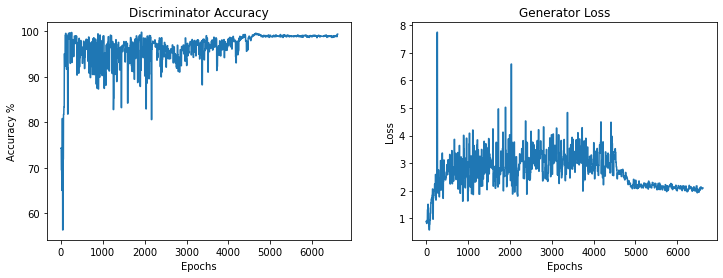

6601 [D loss: 0.032927, acc.: 99.41%] [G loss: 2.189292]
6602 [D loss: 0.053456, acc.: 99.02%] [G loss: 2.012814]
6603 [D loss: 0.064020, acc.: 98.63%] [G loss: 2.069386]
6604 [D loss: 0.069480, acc.: 98.44%] [G loss: 2.223774]
6605 [D loss: 0.057677, acc.: 98.83%] [G loss: 2.202315]
6606 [D loss: 0.032146, acc.: 99.41%] [G loss: 2.162097]
6607 [D loss: 0.007953, acc.: 100.00%] [G loss: 2.359630]
6608 [D loss: 0.054620, acc.: 98.83%] [G loss: 2.001180]
6609 [D loss: 0.016752, acc.: 99.80%] [G loss: 2.255121]
6610 [D loss: 0.061047, acc.: 98.83%] [G loss: 1.925061]
6611 [D loss: 0.026556, acc.: 99.61%] [G loss: 2.098640]
6612 [D loss: 0.058780, acc.: 98.83%] [G loss: 2.249678]
6613 [D loss: 0.031735, acc.: 99.41%] [G loss: 2.236885]
6614 [D loss: 0.031341, acc.: 99.41%] [G loss: 2.462924]
6615 [D loss: 0.044000, acc.: 99.22%] [G loss: 2.286750]
6616 [D loss: 0.066733, acc.: 98.63%] [G loss: 1.925330]
6617 [D loss: 0.058652, acc.: 98.83%] [G loss: 1.980121]
6618 [D loss: 0.063761, acc.: 

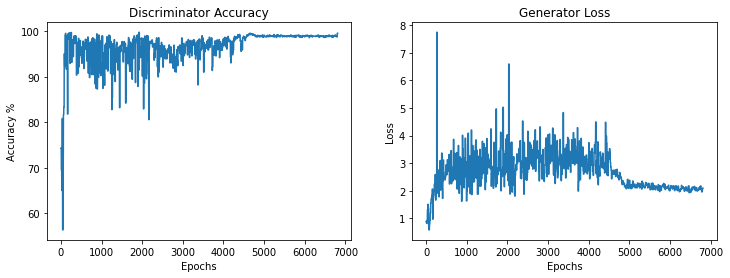

6801 [D loss: 0.032891, acc.: 99.41%] [G loss: 2.294530]
6802 [D loss: 0.035492, acc.: 99.41%] [G loss: 2.107990]
6803 [D loss: 0.060398, acc.: 98.83%] [G loss: 2.184513]
6804 [D loss: 0.050482, acc.: 99.02%] [G loss: 2.223912]
6805 [D loss: 0.049740, acc.: 99.02%] [G loss: 1.962494]
6806 [D loss: 0.057968, acc.: 98.83%] [G loss: 2.131971]
6807 [D loss: 0.070310, acc.: 98.44%] [G loss: 1.849948]
6808 [D loss: 0.048821, acc.: 99.02%] [G loss: 1.991608]
6809 [D loss: 0.033099, acc.: 99.41%] [G loss: 1.902049]
6810 [D loss: 0.043218, acc.: 99.22%] [G loss: 2.174148]
6811 [D loss: 0.080184, acc.: 98.24%] [G loss: 2.202988]
6812 [D loss: 0.041242, acc.: 99.22%] [G loss: 2.001139]
6813 [D loss: 0.091881, acc.: 98.05%] [G loss: 1.873687]
6814 [D loss: 0.034599, acc.: 99.41%] [G loss: 1.827283]
6815 [D loss: 0.073695, acc.: 98.44%] [G loss: 2.062271]
6816 [D loss: 0.063808, acc.: 98.63%] [G loss: 2.215892]
6817 [D loss: 0.033571, acc.: 99.41%] [G loss: 1.955391]
6818 [D loss: 0.075202, acc.: 9

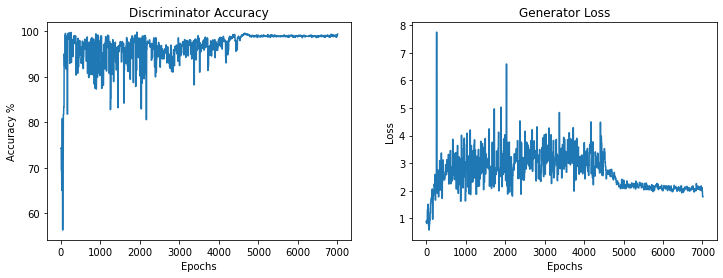

7001 [D loss: 0.066484, acc.: 98.63%] [G loss: 1.918425]
7002 [D loss: 0.049658, acc.: 99.02%] [G loss: 1.988730]
7003 [D loss: 0.050881, acc.: 99.02%] [G loss: 2.131652]
7004 [D loss: 0.058652, acc.: 98.83%] [G loss: 2.018291]
7005 [D loss: 0.056196, acc.: 98.83%] [G loss: 1.915742]
7006 [D loss: 0.056386, acc.: 98.83%] [G loss: 1.984859]
7007 [D loss: 0.051825, acc.: 99.02%] [G loss: 2.224315]
7008 [D loss: 0.016862, acc.: 99.80%] [G loss: 2.132775]
7009 [D loss: 0.050829, acc.: 99.02%] [G loss: 2.447916]
7010 [D loss: 0.041625, acc.: 99.22%] [G loss: 2.382621]
7011 [D loss: 0.051918, acc.: 99.02%] [G loss: 2.124803]
7012 [D loss: 0.049109, acc.: 99.02%] [G loss: 2.060380]
7013 [D loss: 0.023155, acc.: 99.61%] [G loss: 2.021702]
7014 [D loss: 0.076834, acc.: 98.44%] [G loss: 1.886411]
7015 [D loss: 0.033420, acc.: 99.41%] [G loss: 1.981537]
7016 [D loss: 0.040449, acc.: 99.22%] [G loss: 2.129828]
7017 [D loss: 0.058297, acc.: 98.83%] [G loss: 2.020464]
7018 [D loss: 0.068112, acc.: 9

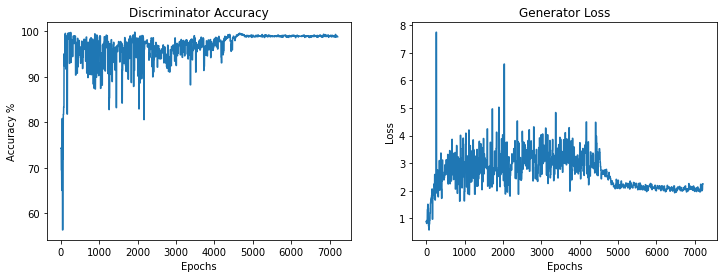

7201 [D loss: 0.048632, acc.: 99.02%] [G loss: 2.371963]
7202 [D loss: 0.055525, acc.: 98.83%] [G loss: 2.000241]
7203 [D loss: 0.046462, acc.: 99.02%] [G loss: 1.840299]
7204 [D loss: 0.032836, acc.: 99.41%] [G loss: 1.882124]
7205 [D loss: 0.032276, acc.: 99.41%] [G loss: 2.173594]
7206 [D loss: 0.033740, acc.: 99.41%] [G loss: 2.052962]
7207 [D loss: 0.042314, acc.: 99.22%] [G loss: 2.199178]
7208 [D loss: 0.043444, acc.: 99.22%] [G loss: 2.187755]
7209 [D loss: 0.071688, acc.: 98.44%] [G loss: 2.339991]
7210 [D loss: 0.033575, acc.: 99.41%] [G loss: 2.071266]
7211 [D loss: 0.074183, acc.: 98.44%] [G loss: 2.018281]
7212 [D loss: 0.069654, acc.: 98.44%] [G loss: 1.930193]
7213 [D loss: 0.071170, acc.: 98.44%] [G loss: 1.961906]
7214 [D loss: 0.033768, acc.: 99.41%] [G loss: 1.930659]
7215 [D loss: 0.042985, acc.: 99.22%] [G loss: 2.150733]
7216 [D loss: 0.025991, acc.: 99.61%] [G loss: 1.951533]
7217 [D loss: 0.033776, acc.: 99.41%] [G loss: 2.281255]
7218 [D loss: 0.025050, acc.: 9

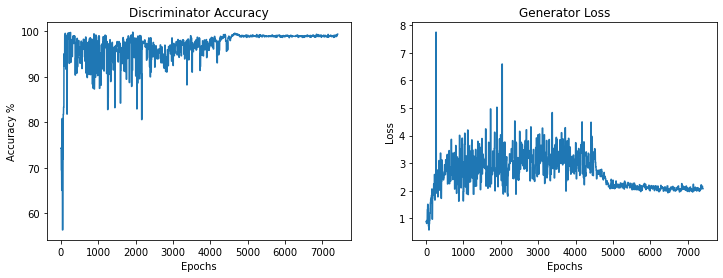

7401 [D loss: 0.015583, acc.: 99.80%] [G loss: 2.407771]
7402 [D loss: 0.033516, acc.: 99.41%] [G loss: 1.888687]
7403 [D loss: 0.073764, acc.: 98.63%] [G loss: 2.083452]
7404 [D loss: 0.025201, acc.: 99.61%] [G loss: 2.278929]
7405 [D loss: 0.040975, acc.: 99.22%] [G loss: 2.125739]
7406 [D loss: 0.083268, acc.: 98.24%] [G loss: 2.361743]
7407 [D loss: 0.042063, acc.: 99.22%] [G loss: 2.194717]
7408 [D loss: 0.040008, acc.: 99.22%] [G loss: 1.760840]
7409 [D loss: 0.008848, acc.: 100.00%] [G loss: 2.237251]
7410 [D loss: 0.058587, acc.: 98.83%] [G loss: 2.172120]
7411 [D loss: 0.084721, acc.: 98.24%] [G loss: 1.960270]
7412 [D loss: 0.063699, acc.: 98.63%] [G loss: 2.085616]
7413 [D loss: 0.071335, acc.: 98.44%] [G loss: 1.947242]
7414 [D loss: 0.050351, acc.: 99.02%] [G loss: 2.031386]
7415 [D loss: 0.041344, acc.: 99.22%] [G loss: 1.948492]
7416 [D loss: 0.041275, acc.: 99.22%] [G loss: 2.061868]
7417 [D loss: 0.039349, acc.: 99.22%] [G loss: 2.036940]
7418 [D loss: 0.063990, acc.: 

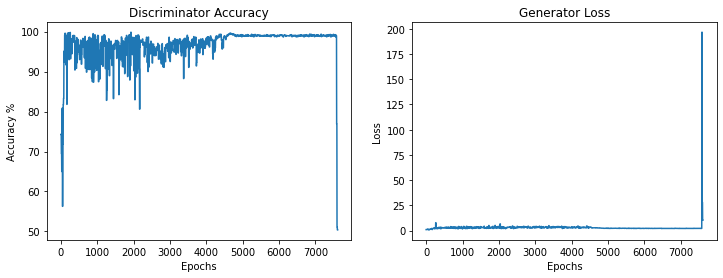

7601 [D loss: 2.804415, acc.: 54.49%] [G loss: 6.825173]
7602 [D loss: 2.221167, acc.: 57.81%] [G loss: 2.663107]
7603 [D loss: 2.336414, acc.: 52.93%] [G loss: 5.780389]
7604 [D loss: 1.992942, acc.: 64.26%] [G loss: 5.582909]
7605 [D loss: 1.114351, acc.: 73.24%] [G loss: 3.551731]
7606 [D loss: 0.636462, acc.: 81.84%] [G loss: 2.988335]
7607 [D loss: 0.890771, acc.: 68.75%] [G loss: 3.619315]
7608 [D loss: 0.665879, acc.: 76.17%] [G loss: 2.823265]
7609 [D loss: 1.008213, acc.: 62.30%] [G loss: 2.921929]
7610 [D loss: 0.981625, acc.: 62.30%] [G loss: 2.933575]
7611 [D loss: 1.956361, acc.: 41.02%] [G loss: 3.098989]
7612 [D loss: 1.462169, acc.: 55.08%] [G loss: 2.761517]
7613 [D loss: 2.517740, acc.: 33.98%] [G loss: 3.812289]
7614 [D loss: 1.747812, acc.: 50.20%] [G loss: 2.568480]
7615 [D loss: 1.977190, acc.: 36.13%] [G loss: 1.988923]
7616 [D loss: 1.361107, acc.: 52.73%] [G loss: 2.206932]
7617 [D loss: 1.124250, acc.: 58.59%] [G loss: 1.772176]
7618 [D loss: 0.983029, acc.: 6

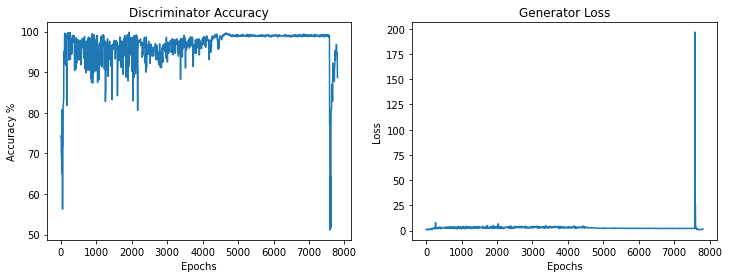

7801 [D loss: 0.303226, acc.: 88.87%] [G loss: 1.642238]
7802 [D loss: 0.220149, acc.: 92.77%] [G loss: 1.506948]
7803 [D loss: 0.209063, acc.: 93.55%] [G loss: 1.488086]
7804 [D loss: 0.252041, acc.: 90.82%] [G loss: 1.816997]
7805 [D loss: 0.249938, acc.: 90.43%] [G loss: 1.566489]
7806 [D loss: 0.149562, acc.: 95.31%] [G loss: 1.946849]
7807 [D loss: 0.182271, acc.: 93.16%] [G loss: 1.822799]
7808 [D loss: 0.180808, acc.: 94.53%] [G loss: 1.598208]
7809 [D loss: 0.140948, acc.: 95.90%] [G loss: 1.990981]
7810 [D loss: 0.244027, acc.: 91.21%] [G loss: 1.549821]
7811 [D loss: 0.110269, acc.: 97.27%] [G loss: 1.929063]
7812 [D loss: 0.127030, acc.: 96.68%] [G loss: 1.958145]
7813 [D loss: 0.215920, acc.: 93.16%] [G loss: 1.581269]
7814 [D loss: 0.145167, acc.: 95.90%] [G loss: 1.525784]
7815 [D loss: 0.195421, acc.: 93.75%] [G loss: 1.689542]
7816 [D loss: 0.100087, acc.: 97.85%] [G loss: 1.693795]
7817 [D loss: 0.157008, acc.: 94.73%] [G loss: 1.744587]
7818 [D loss: 0.239404, acc.: 9

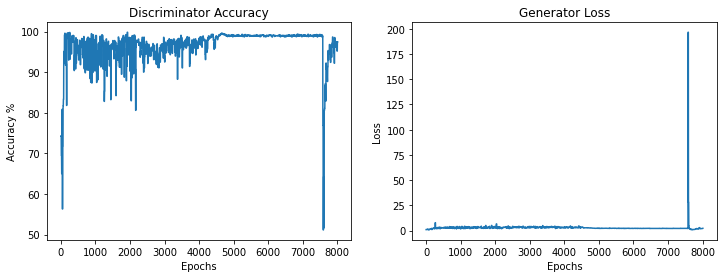

8001 [D loss: 0.114649, acc.: 95.90%] [G loss: 2.128477]
8002 [D loss: 0.065843, acc.: 98.83%] [G loss: 2.309267]
8003 [D loss: 0.101315, acc.: 97.27%] [G loss: 2.372309]
8004 [D loss: 0.067148, acc.: 98.24%] [G loss: 2.028427]
8005 [D loss: 0.096685, acc.: 98.24%] [G loss: 2.132420]
8006 [D loss: 0.070447, acc.: 98.24%] [G loss: 2.622002]
8007 [D loss: 0.077326, acc.: 97.85%] [G loss: 2.679175]
8008 [D loss: 0.145820, acc.: 95.51%] [G loss: 2.042812]
8009 [D loss: 0.153046, acc.: 95.31%] [G loss: 2.632256]
8010 [D loss: 0.092566, acc.: 97.46%] [G loss: 2.116311]
8011 [D loss: 0.078095, acc.: 98.44%] [G loss: 2.106655]
8012 [D loss: 0.044317, acc.: 99.41%] [G loss: 2.086287]
8013 [D loss: 0.115321, acc.: 97.27%] [G loss: 2.244691]
8014 [D loss: 0.111014, acc.: 96.68%] [G loss: 2.193788]
8015 [D loss: 0.072924, acc.: 98.24%] [G loss: 2.310785]
8016 [D loss: 0.126314, acc.: 96.88%] [G loss: 2.256644]
8017 [D loss: 0.081738, acc.: 97.66%] [G loss: 1.853683]
8018 [D loss: 0.060513, acc.: 9

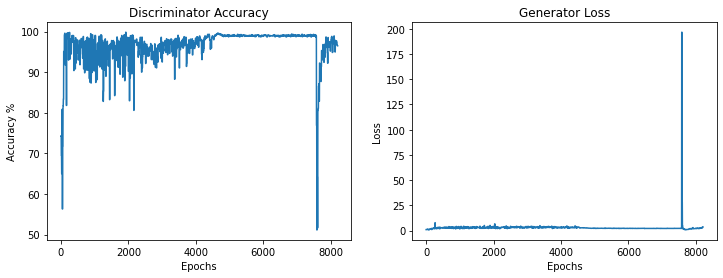

8201 [D loss: 0.198226, acc.: 94.92%] [G loss: 2.769005]
8202 [D loss: 0.111995, acc.: 96.09%] [G loss: 2.500957]
8203 [D loss: 0.055810, acc.: 97.85%] [G loss: 2.084120]
8204 [D loss: 0.081428, acc.: 98.05%] [G loss: 2.496314]
8205 [D loss: 0.056411, acc.: 98.44%] [G loss: 2.352328]
8206 [D loss: 0.092921, acc.: 97.07%] [G loss: 2.554582]
8207 [D loss: 0.083829, acc.: 97.85%] [G loss: 2.321066]
8208 [D loss: 0.080417, acc.: 97.85%] [G loss: 2.222116]
8209 [D loss: 0.102790, acc.: 97.85%] [G loss: 2.573854]
8210 [D loss: 0.061814, acc.: 98.24%] [G loss: 2.168737]
8211 [D loss: 0.088550, acc.: 97.66%] [G loss: 2.282489]
8212 [D loss: 0.063055, acc.: 98.44%] [G loss: 2.596952]
8213 [D loss: 0.088019, acc.: 98.24%] [G loss: 2.618690]
8214 [D loss: 0.104387, acc.: 97.66%] [G loss: 2.640395]
8215 [D loss: 0.034584, acc.: 99.22%] [G loss: 2.393637]
8216 [D loss: 0.123246, acc.: 96.88%] [G loss: 2.447888]
8217 [D loss: 0.098983, acc.: 97.46%] [G loss: 2.303033]
8218 [D loss: 0.032069, acc.: 9

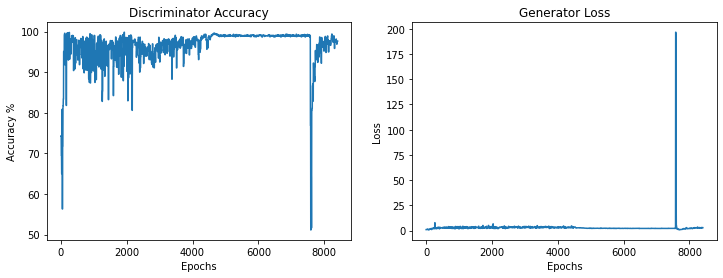

8401 [D loss: 0.122571, acc.: 96.88%] [G loss: 2.319897]
8402 [D loss: 0.074779, acc.: 98.63%] [G loss: 2.674493]
8403 [D loss: 0.091925, acc.: 97.85%] [G loss: 2.419890]
8404 [D loss: 0.126046, acc.: 97.85%] [G loss: 2.763546]
8405 [D loss: 0.082957, acc.: 98.44%] [G loss: 2.611141]
8406 [D loss: 0.152372, acc.: 97.27%] [G loss: 2.835105]
8407 [D loss: 0.085718, acc.: 97.85%] [G loss: 3.129732]
8408 [D loss: 0.082309, acc.: 98.83%] [G loss: 2.681326]
8409 [D loss: 0.054083, acc.: 99.22%] [G loss: 2.475213]
8410 [D loss: 0.090065, acc.: 98.63%] [G loss: 2.719159]
8411 [D loss: 0.120112, acc.: 97.27%] [G loss: 2.661236]
8412 [D loss: 0.167172, acc.: 97.46%] [G loss: 2.381902]
8413 [D loss: 0.087785, acc.: 98.83%] [G loss: 2.338477]
8414 [D loss: 0.061754, acc.: 98.83%] [G loss: 2.309897]
8415 [D loss: 0.066584, acc.: 99.22%] [G loss: 2.549399]
8416 [D loss: 0.117494, acc.: 97.46%] [G loss: 2.249035]
8417 [D loss: 0.077484, acc.: 97.85%] [G loss: 2.363976]
8418 [D loss: 0.102124, acc.: 9

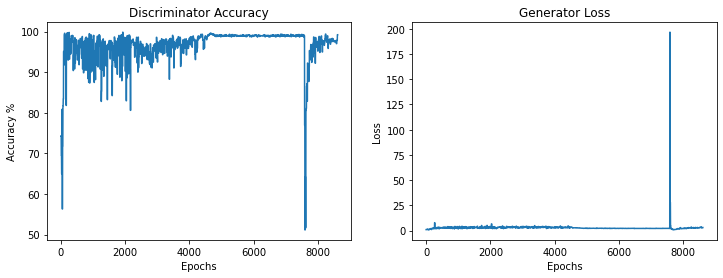

8601 [D loss: 0.076989, acc.: 97.66%] [G loss: 2.210665]
8602 [D loss: 0.042994, acc.: 99.41%] [G loss: 2.554504]
8603 [D loss: 0.074538, acc.: 97.85%] [G loss: 2.606159]
8604 [D loss: 0.071562, acc.: 98.24%] [G loss: 2.449330]
8605 [D loss: 0.066222, acc.: 97.85%] [G loss: 2.804005]
8606 [D loss: 0.073987, acc.: 97.46%] [G loss: 2.531235]
8607 [D loss: 0.051866, acc.: 98.44%] [G loss: 2.435056]
8608 [D loss: 0.084783, acc.: 96.88%] [G loss: 2.684103]
8609 [D loss: 0.031073, acc.: 99.02%] [G loss: 2.725660]
8610 [D loss: 0.043997, acc.: 98.63%] [G loss: 2.330491]
8611 [D loss: 0.033748, acc.: 99.02%] [G loss: 2.321356]
8612 [D loss: 0.049842, acc.: 98.63%] [G loss: 2.161705]
8613 [D loss: 0.044352, acc.: 98.83%] [G loss: 2.774918]
8614 [D loss: 0.039707, acc.: 99.02%] [G loss: 2.331331]
8615 [D loss: 0.050056, acc.: 98.83%] [G loss: 2.339599]
8616 [D loss: 0.050779, acc.: 98.44%] [G loss: 2.144357]
8617 [D loss: 0.070265, acc.: 97.27%] [G loss: 2.420048]
8618 [D loss: 0.041348, acc.: 9

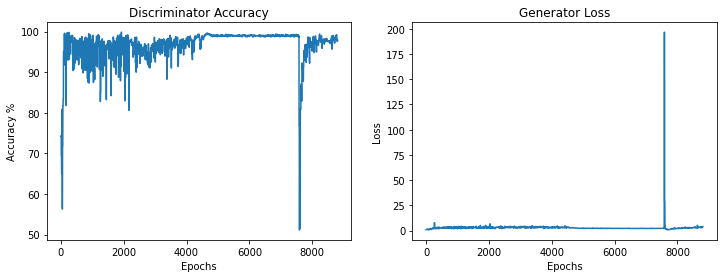

8801 [D loss: 0.101119, acc.: 96.88%] [G loss: 3.621287]
8802 [D loss: 0.139928, acc.: 97.07%] [G loss: 3.525189]
8803 [D loss: 0.099408, acc.: 97.27%] [G loss: 3.456718]
8804 [D loss: 0.106035, acc.: 96.29%] [G loss: 3.673709]
8805 [D loss: 0.040197, acc.: 98.63%] [G loss: 2.917726]
8806 [D loss: 0.121541, acc.: 96.68%] [G loss: 3.911987]
8807 [D loss: 0.106404, acc.: 96.09%] [G loss: 3.148062]
8808 [D loss: 0.111389, acc.: 96.09%] [G loss: 3.966038]
8809 [D loss: 0.065579, acc.: 97.46%] [G loss: 3.774948]
8810 [D loss: 0.037527, acc.: 99.61%] [G loss: 2.736433]
8811 [D loss: 0.055591, acc.: 98.24%] [G loss: 3.016334]
8812 [D loss: 0.091340, acc.: 97.07%] [G loss: 3.077079]
8813 [D loss: 0.023298, acc.: 99.41%] [G loss: 3.162262]
8814 [D loss: 0.058875, acc.: 98.05%] [G loss: 3.327734]
8815 [D loss: 0.074850, acc.: 98.05%] [G loss: 3.416312]
8816 [D loss: 0.281670, acc.: 88.28%] [G loss: 6.685538]
8817 [D loss: 0.185947, acc.: 93.36%] [G loss: 4.103889]
8818 [D loss: 0.111605, acc.: 9

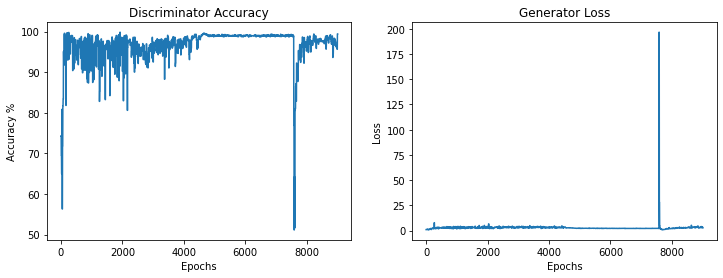

9001 [D loss: 0.073118, acc.: 97.66%] [G loss: 2.772664]
9002 [D loss: 0.029859, acc.: 99.61%] [G loss: 2.742982]
9003 [D loss: 0.062621, acc.: 98.63%] [G loss: 3.044122]
9004 [D loss: 0.060085, acc.: 98.44%] [G loss: 2.450265]
9005 [D loss: 0.136465, acc.: 95.90%] [G loss: 3.394860]
9006 [D loss: 0.082951, acc.: 97.85%] [G loss: 3.472880]
9007 [D loss: 0.081045, acc.: 97.07%] [G loss: 2.252384]
9008 [D loss: 0.040189, acc.: 99.02%] [G loss: 2.570329]
9009 [D loss: 0.040705, acc.: 99.02%] [G loss: 2.728969]
9010 [D loss: 0.060849, acc.: 98.24%] [G loss: 2.912751]
9011 [D loss: 0.054478, acc.: 98.83%] [G loss: 3.086727]
9012 [D loss: 0.064421, acc.: 98.24%] [G loss: 2.691372]
9013 [D loss: 0.071352, acc.: 96.88%] [G loss: 3.305510]
9014 [D loss: 0.098329, acc.: 96.09%] [G loss: 2.530026]
9015 [D loss: 0.045319, acc.: 98.83%] [G loss: 2.893827]
9016 [D loss: 0.042165, acc.: 99.02%] [G loss: 2.835649]
9017 [D loss: 0.138712, acc.: 96.48%] [G loss: 3.234920]
9018 [D loss: 0.044706, acc.: 9

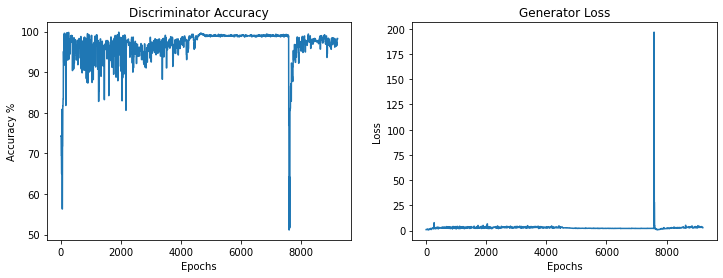

9201 [D loss: 0.216193, acc.: 90.62%] [G loss: 4.082721]
9202 [D loss: 0.306075, acc.: 93.75%] [G loss: 4.433951]
9203 [D loss: 0.086201, acc.: 98.05%] [G loss: 4.586947]
9204 [D loss: 0.076742, acc.: 98.83%] [G loss: 3.519597]
9205 [D loss: 0.030321, acc.: 99.41%] [G loss: 2.944744]
9206 [D loss: 0.038675, acc.: 98.83%] [G loss: 2.693574]
9207 [D loss: 0.024120, acc.: 99.61%] [G loss: 2.492360]
9208 [D loss: 0.041881, acc.: 98.83%] [G loss: 2.416933]
9209 [D loss: 0.040324, acc.: 99.02%] [G loss: 2.809577]
9210 [D loss: 0.056756, acc.: 98.24%] [G loss: 2.302510]
9211 [D loss: 0.023752, acc.: 99.80%] [G loss: 2.800578]
9212 [D loss: 0.025779, acc.: 99.61%] [G loss: 2.601774]
9213 [D loss: 0.065500, acc.: 98.63%] [G loss: 2.654995]
9214 [D loss: 0.041478, acc.: 99.02%] [G loss: 2.669262]
9215 [D loss: 0.036130, acc.: 99.61%] [G loss: 3.124728]
9216 [D loss: 0.062241, acc.: 98.83%] [G loss: 2.429140]
9217 [D loss: 0.089401, acc.: 97.46%] [G loss: 2.839922]
9218 [D loss: 0.056016, acc.: 9

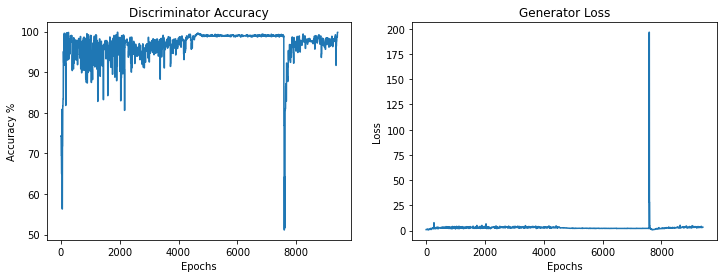

9401 [D loss: 0.042355, acc.: 98.83%] [G loss: 3.502234]
9402 [D loss: 0.024265, acc.: 99.22%] [G loss: 3.824101]
9403 [D loss: 0.024073, acc.: 99.02%] [G loss: 3.153321]
9404 [D loss: 0.041708, acc.: 99.02%] [G loss: 3.737319]
9405 [D loss: 0.041903, acc.: 99.22%] [G loss: 3.857302]
9406 [D loss: 0.056643, acc.: 98.05%] [G loss: 4.271623]
9407 [D loss: 0.143521, acc.: 93.36%] [G loss: 5.363942]
9408 [D loss: 0.310522, acc.: 92.58%] [G loss: 6.043439]
9409 [D loss: 0.144593, acc.: 96.48%] [G loss: 4.503786]
9410 [D loss: 0.042795, acc.: 98.44%] [G loss: 3.346374]
9411 [D loss: 0.062585, acc.: 98.24%] [G loss: 5.151066]
9412 [D loss: 0.043106, acc.: 98.44%] [G loss: 4.730802]
9413 [D loss: 0.013602, acc.: 99.61%] [G loss: 3.514651]
9414 [D loss: 0.041207, acc.: 97.46%] [G loss: 3.450754]
9415 [D loss: 0.067205, acc.: 97.66%] [G loss: 4.351406]
9416 [D loss: 0.155913, acc.: 92.97%] [G loss: 6.331938]
9417 [D loss: 0.199047, acc.: 95.51%] [G loss: 4.762978]
9418 [D loss: 0.269169, acc.: 9

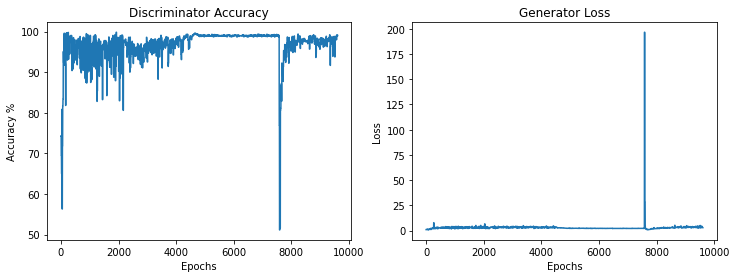

9601 [D loss: 0.071772, acc.: 99.02%] [G loss: 3.886107]
9602 [D loss: 0.014063, acc.: 99.41%] [G loss: 3.961369]
9603 [D loss: 0.051451, acc.: 97.66%] [G loss: 2.703845]
9604 [D loss: 0.144080, acc.: 94.53%] [G loss: 5.559863]
9605 [D loss: 0.130452, acc.: 97.07%] [G loss: 6.039236]
9606 [D loss: 0.064840, acc.: 97.85%] [G loss: 4.729788]
9607 [D loss: 0.022217, acc.: 99.41%] [G loss: 3.112322]
9608 [D loss: 0.008825, acc.: 100.00%] [G loss: 3.184679]
9609 [D loss: 0.007425, acc.: 100.00%] [G loss: 2.374542]
9610 [D loss: 0.013867, acc.: 100.00%] [G loss: 2.514153]
9611 [D loss: 0.015784, acc.: 99.80%] [G loss: 2.842998]
9612 [D loss: 0.018571, acc.: 99.80%] [G loss: 2.716483]
9613 [D loss: 0.040462, acc.: 99.80%] [G loss: 3.812863]
9614 [D loss: 0.018130, acc.: 99.41%] [G loss: 3.597393]
9615 [D loss: 0.026550, acc.: 99.80%] [G loss: 2.982548]
9616 [D loss: 0.063113, acc.: 99.22%] [G loss: 4.913625]
9617 [D loss: 0.025825, acc.: 98.83%] [G loss: 5.348528]
9618 [D loss: 0.030841, acc.

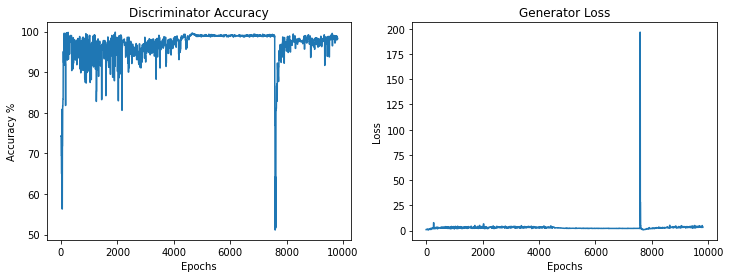

9801 [D loss: 0.012727, acc.: 100.00%] [G loss: 3.027585]
9802 [D loss: 0.029163, acc.: 99.61%] [G loss: 3.037359]
9803 [D loss: 0.028481, acc.: 99.22%] [G loss: 3.012528]
9804 [D loss: 0.030823, acc.: 99.61%] [G loss: 3.658429]
9805 [D loss: 0.033941, acc.: 99.02%] [G loss: 3.447018]
9806 [D loss: 0.129816, acc.: 93.75%] [G loss: 7.099124]
9807 [D loss: 0.666960, acc.: 88.87%] [G loss: 3.829530]
9808 [D loss: 0.123114, acc.: 95.70%] [G loss: 3.370705]
9809 [D loss: 0.130154, acc.: 96.09%] [G loss: 4.084073]
9810 [D loss: 0.075640, acc.: 96.88%] [G loss: 3.492057]
9811 [D loss: 0.148350, acc.: 97.27%] [G loss: 2.485366]
9812 [D loss: 0.025460, acc.: 99.61%] [G loss: 2.957602]
9813 [D loss: 0.041280, acc.: 99.61%] [G loss: 3.179165]
9814 [D loss: 0.019397, acc.: 99.41%] [G loss: 3.036344]
9815 [D loss: 0.029025, acc.: 99.41%] [G loss: 2.500955]
9816 [D loss: 0.019841, acc.: 99.80%] [G loss: 2.763908]
9817 [D loss: 0.053884, acc.: 99.22%] [G loss: 3.552478]
9818 [D loss: 0.110847, acc.: 

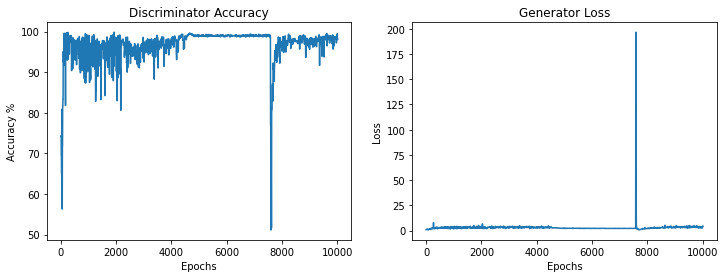

10001 [D loss: 0.081004, acc.: 97.66%] [G loss: 3.698652]
10002 [D loss: 0.033856, acc.: 98.63%] [G loss: 3.214751]
10003 [D loss: 0.022596, acc.: 99.61%] [G loss: 2.491170]
10004 [D loss: 0.019878, acc.: 99.80%] [G loss: 2.712834]
10005 [D loss: 0.057205, acc.: 97.66%] [G loss: 3.597685]
10006 [D loss: 0.053089, acc.: 98.44%] [G loss: 2.608609]
10007 [D loss: 0.013730, acc.: 99.80%] [G loss: 2.797172]
10008 [D loss: 0.027366, acc.: 99.80%] [G loss: 2.978268]
10009 [D loss: 0.015099, acc.: 100.00%] [G loss: 3.354025]
10010 [D loss: 0.015596, acc.: 99.80%] [G loss: 2.701877]
10011 [D loss: 0.029376, acc.: 99.80%] [G loss: 2.850465]
10012 [D loss: 0.035654, acc.: 99.61%] [G loss: 3.029122]
10013 [D loss: 0.027333, acc.: 99.61%] [G loss: 2.745934]
10014 [D loss: 0.025928, acc.: 99.61%] [G loss: 2.984020]
10015 [D loss: 0.048694, acc.: 99.02%] [G loss: 3.452592]
10016 [D loss: 0.026583, acc.: 99.41%] [G loss: 3.611984]
10017 [D loss: 0.029074, acc.: 99.02%] [G loss: 2.738912]
10018 [D loss

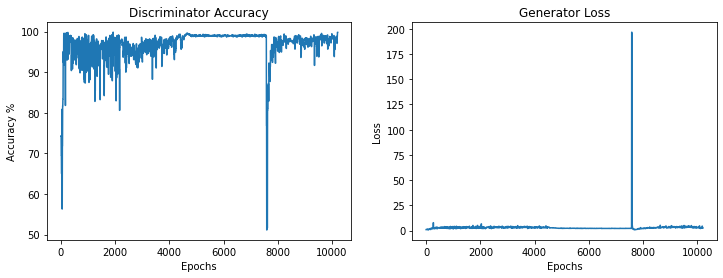

10201 [D loss: 0.023522, acc.: 100.00%] [G loss: 2.529301]
10202 [D loss: 0.065838, acc.: 97.85%] [G loss: 3.366192]
10203 [D loss: 0.058155, acc.: 97.85%] [G loss: 2.781132]
10204 [D loss: 0.085950, acc.: 97.66%] [G loss: 2.802384]
10205 [D loss: 0.026179, acc.: 99.41%] [G loss: 2.920677]
10206 [D loss: 0.043498, acc.: 99.02%] [G loss: 3.726450]
10207 [D loss: 0.047325, acc.: 98.44%] [G loss: 3.274406]
10208 [D loss: 0.024253, acc.: 99.02%] [G loss: 3.028243]
10209 [D loss: 0.030630, acc.: 99.22%] [G loss: 2.908226]
10210 [D loss: 0.021965, acc.: 99.61%] [G loss: 3.054920]
10211 [D loss: 0.019223, acc.: 99.41%] [G loss: 3.098293]
10212 [D loss: 0.027744, acc.: 99.61%] [G loss: 3.409396]
10213 [D loss: 0.067896, acc.: 97.66%] [G loss: 2.846301]
10214 [D loss: 0.026585, acc.: 99.41%] [G loss: 3.084681]
10215 [D loss: 0.040592, acc.: 98.44%] [G loss: 3.358763]
10216 [D loss: 0.029130, acc.: 99.41%] [G loss: 3.280921]
10217 [D loss: 0.033830, acc.: 98.83%] [G loss: 2.801181]
10218 [D loss

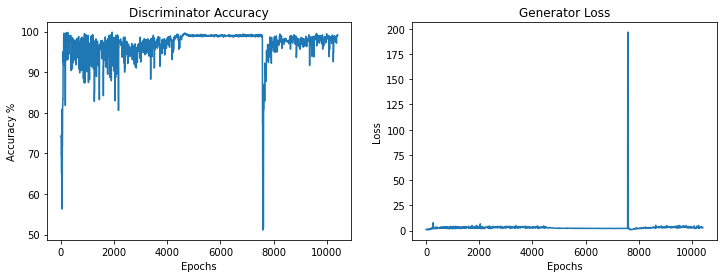

10401 [D loss: 0.018265, acc.: 99.61%] [G loss: 2.381347]
10402 [D loss: 0.029874, acc.: 99.41%] [G loss: 2.675295]
10403 [D loss: 0.013425, acc.: 99.80%] [G loss: 2.988545]
10404 [D loss: 0.025607, acc.: 99.22%] [G loss: 3.062717]
10405 [D loss: 0.034399, acc.: 99.02%] [G loss: 3.221894]
10406 [D loss: 0.032326, acc.: 99.02%] [G loss: 2.979830]
10407 [D loss: 0.021475, acc.: 99.41%] [G loss: 3.411585]
10408 [D loss: 0.011055, acc.: 99.80%] [G loss: 2.825204]
10409 [D loss: 0.079026, acc.: 97.66%] [G loss: 3.930768]
10410 [D loss: 0.142518, acc.: 95.70%] [G loss: 3.668252]
10411 [D loss: 0.025775, acc.: 99.22%] [G loss: 3.630286]
10412 [D loss: 0.032603, acc.: 98.83%] [G loss: 3.848371]
10413 [D loss: 0.011774, acc.: 99.61%] [G loss: 2.829167]
10414 [D loss: 0.015324, acc.: 99.80%] [G loss: 2.946844]
10415 [D loss: 0.039735, acc.: 99.41%] [G loss: 4.782089]
10416 [D loss: 0.037414, acc.: 98.24%] [G loss: 4.056118]
10417 [D loss: 0.028880, acc.: 99.22%] [G loss: 3.622866]
10418 [D loss:

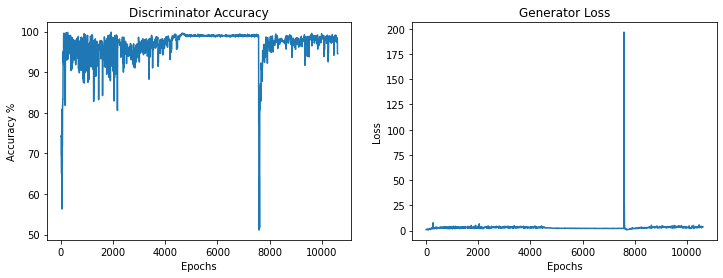

10601 [D loss: 0.120303, acc.: 96.48%] [G loss: 4.392835]
10602 [D loss: 0.118252, acc.: 95.70%] [G loss: 4.336286]
10603 [D loss: 0.092320, acc.: 97.27%] [G loss: 3.428744]
10604 [D loss: 0.020228, acc.: 99.02%] [G loss: 2.722883]
10605 [D loss: 0.013672, acc.: 99.80%] [G loss: 2.876712]
10606 [D loss: 0.014595, acc.: 99.80%] [G loss: 2.378795]
10607 [D loss: 0.024451, acc.: 99.61%] [G loss: 2.829113]
10608 [D loss: 0.024181, acc.: 99.80%] [G loss: 3.217663]
10609 [D loss: 0.117002, acc.: 94.73%] [G loss: 5.350524]
10610 [D loss: 0.186092, acc.: 97.27%] [G loss: 5.248354]
10611 [D loss: 0.307249, acc.: 95.12%] [G loss: 2.813418]
10612 [D loss: 0.138019, acc.: 97.27%] [G loss: 2.575364]
10613 [D loss: 0.034110, acc.: 99.41%] [G loss: 2.315124]
10614 [D loss: 0.068279, acc.: 97.85%] [G loss: 2.617261]
10615 [D loss: 0.039644, acc.: 99.41%] [G loss: 2.558884]
10616 [D loss: 0.018679, acc.: 100.00%] [G loss: 2.308741]
10617 [D loss: 0.024306, acc.: 100.00%] [G loss: 2.797904]
10618 [D los

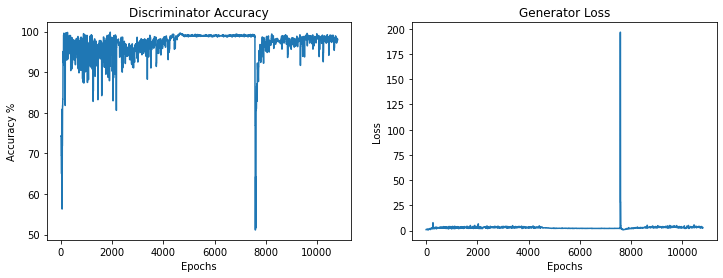

10801 [D loss: 0.280616, acc.: 90.62%] [G loss: 3.848471]
10802 [D loss: 0.162524, acc.: 97.46%] [G loss: 3.704281]
10803 [D loss: 0.167575, acc.: 98.05%] [G loss: 2.995688]
10804 [D loss: 0.146599, acc.: 97.46%] [G loss: 2.608165]
10805 [D loss: 0.047194, acc.: 99.02%] [G loss: 2.569897]
10806 [D loss: 0.081397, acc.: 97.66%] [G loss: 3.083013]
10807 [D loss: 0.091919, acc.: 96.68%] [G loss: 3.277428]
10808 [D loss: 0.041570, acc.: 99.02%] [G loss: 2.389045]
10809 [D loss: 0.062778, acc.: 98.05%] [G loss: 2.315101]
10810 [D loss: 0.029297, acc.: 98.83%] [G loss: 2.585932]
10811 [D loss: 0.038641, acc.: 98.83%] [G loss: 2.470577]
10812 [D loss: 0.032355, acc.: 99.80%] [G loss: 2.679866]
10813 [D loss: 0.024830, acc.: 98.83%] [G loss: 2.473466]
10814 [D loss: 0.036623, acc.: 99.22%] [G loss: 3.125450]
10815 [D loss: 0.025279, acc.: 99.02%] [G loss: 2.752698]
10816 [D loss: 0.040541, acc.: 99.22%] [G loss: 2.455626]
10817 [D loss: 0.057419, acc.: 97.27%] [G loss: 2.714034]
10818 [D loss:

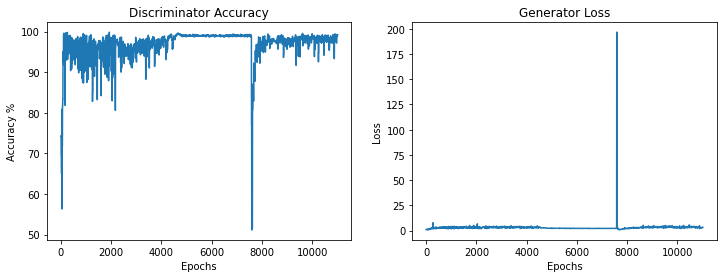

11001 [D loss: 0.030544, acc.: 98.63%] [G loss: 3.307146]
11002 [D loss: 0.018947, acc.: 99.80%] [G loss: 2.725331]
11003 [D loss: 0.036840, acc.: 98.83%] [G loss: 2.830093]
11004 [D loss: 0.012385, acc.: 99.80%] [G loss: 3.194976]
11005 [D loss: 0.053476, acc.: 98.44%] [G loss: 3.903604]
11006 [D loss: 0.075932, acc.: 96.68%] [G loss: 3.901486]
11007 [D loss: 0.008485, acc.: 100.00%] [G loss: 2.801826]
11008 [D loss: 0.037842, acc.: 99.61%] [G loss: 3.004923]
11009 [D loss: 0.024174, acc.: 98.63%] [G loss: 2.485764]
11010 [D loss: 0.076614, acc.: 98.44%] [G loss: 3.025590]
11011 [D loss: 0.019429, acc.: 99.80%] [G loss: 3.369478]
11012 [D loss: 0.029007, acc.: 99.02%] [G loss: 2.566840]
11013 [D loss: 0.027658, acc.: 99.80%] [G loss: 3.105991]
11014 [D loss: 0.022782, acc.: 99.22%] [G loss: 2.702444]
11015 [D loss: 0.029092, acc.: 99.22%] [G loss: 2.876899]
11016 [D loss: 0.034674, acc.: 98.83%] [G loss: 3.258631]
11017 [D loss: 0.035581, acc.: 98.83%] [G loss: 2.539500]
11018 [D loss

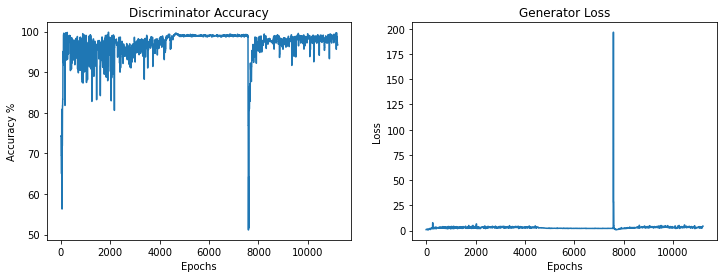

11201 [D loss: 0.078433, acc.: 96.48%] [G loss: 2.702184]
11202 [D loss: 0.049764, acc.: 99.80%] [G loss: 3.871819]
11203 [D loss: 0.014205, acc.: 99.61%] [G loss: 5.550787]
11204 [D loss: 0.073121, acc.: 97.85%] [G loss: 3.146317]
11205 [D loss: 0.003542, acc.: 100.00%] [G loss: 3.387576]
11206 [D loss: 0.005542, acc.: 100.00%] [G loss: 3.147363]
11207 [D loss: 0.044873, acc.: 98.24%] [G loss: 3.682133]
11208 [D loss: 0.008563, acc.: 99.80%] [G loss: 3.600437]
11209 [D loss: 0.084252, acc.: 96.88%] [G loss: 3.230086]
11210 [D loss: 0.050087, acc.: 98.83%] [G loss: 3.662251]
11211 [D loss: 0.123890, acc.: 93.95%] [G loss: 3.330908]
11212 [D loss: 0.390684, acc.: 84.18%] [G loss: 12.387760]
11213 [D loss: 1.226315, acc.: 85.94%] [G loss: 4.883332]
11214 [D loss: 0.558826, acc.: 86.33%] [G loss: 3.778955]
11215 [D loss: 0.300378, acc.: 91.21%] [G loss: 3.264426]
11216 [D loss: 0.136306, acc.: 96.48%] [G loss: 2.532655]
11217 [D loss: 0.080228, acc.: 98.05%] [G loss: 2.177997]
11218 [D lo

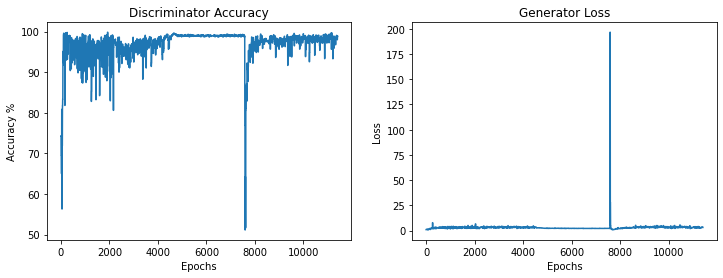

11401 [D loss: 0.034938, acc.: 98.83%] [G loss: 3.019718]
11402 [D loss: 0.068474, acc.: 96.88%] [G loss: 3.422078]
11403 [D loss: 0.365185, acc.: 86.52%] [G loss: 10.721628]
11404 [D loss: 1.071722, acc.: 83.01%] [G loss: 5.013791]
11405 [D loss: 0.266377, acc.: 94.53%] [G loss: 3.821642]
11406 [D loss: 0.249636, acc.: 93.75%] [G loss: 2.245347]
11407 [D loss: 0.129992, acc.: 96.29%] [G loss: 1.990474]
11408 [D loss: 0.048289, acc.: 98.44%] [G loss: 2.367668]
11409 [D loss: 0.068069, acc.: 98.05%] [G loss: 2.167766]
11410 [D loss: 0.102302, acc.: 96.68%] [G loss: 1.754690]
11411 [D loss: 0.031101, acc.: 99.41%] [G loss: 2.194953]
11412 [D loss: 0.050282, acc.: 99.02%] [G loss: 2.623608]
11413 [D loss: 0.069234, acc.: 98.24%] [G loss: 2.237083]
11414 [D loss: 0.057899, acc.: 98.05%] [G loss: 2.794219]
11415 [D loss: 0.053083, acc.: 98.44%] [G loss: 3.063424]
11416 [D loss: 0.052680, acc.: 98.63%] [G loss: 3.824892]
11417 [D loss: 0.057622, acc.: 98.24%] [G loss: 3.496384]
11418 [D loss

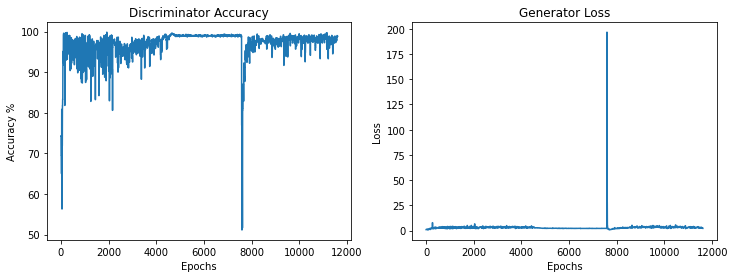

11601 [D loss: 0.058175, acc.: 98.83%] [G loss: 2.530277]
11602 [D loss: 0.099876, acc.: 97.46%] [G loss: 2.387356]
11603 [D loss: 0.059564, acc.: 98.83%] [G loss: 2.178065]
11604 [D loss: 0.024545, acc.: 99.41%] [G loss: 2.388679]
11605 [D loss: 0.016495, acc.: 99.80%] [G loss: 2.565199]
11606 [D loss: 0.033752, acc.: 99.41%] [G loss: 2.527597]
11607 [D loss: 0.044139, acc.: 99.02%] [G loss: 2.382615]
11608 [D loss: 0.052874, acc.: 98.83%] [G loss: 2.529354]
11609 [D loss: 0.049593, acc.: 99.02%] [G loss: 2.398238]
11610 [D loss: 0.045261, acc.: 99.22%] [G loss: 2.375205]
11611 [D loss: 0.081586, acc.: 98.24%] [G loss: 2.106216]
11612 [D loss: 0.097274, acc.: 98.05%] [G loss: 2.026363]
11613 [D loss: 0.053056, acc.: 98.63%] [G loss: 2.610623]
11614 [D loss: 0.059949, acc.: 98.83%] [G loss: 2.299133]
11615 [D loss: 0.044446, acc.: 98.83%] [G loss: 2.273117]
11616 [D loss: 0.056936, acc.: 98.83%] [G loss: 2.311212]
11617 [D loss: 0.048498, acc.: 99.02%] [G loss: 2.344868]
11618 [D loss:

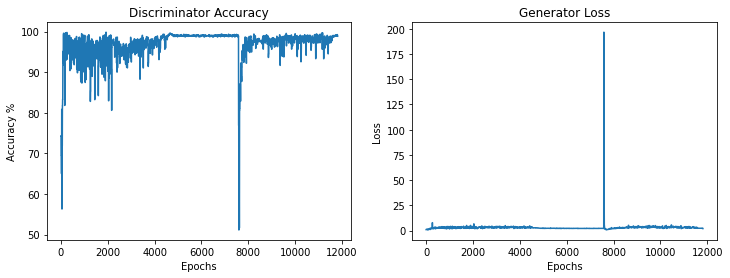

11801 [D loss: 0.059913, acc.: 98.83%] [G loss: 1.922659]
11802 [D loss: 0.060934, acc.: 98.83%] [G loss: 2.255472]
11803 [D loss: 0.041577, acc.: 99.22%] [G loss: 1.948104]
11804 [D loss: 0.040769, acc.: 99.22%] [G loss: 2.249430]
11805 [D loss: 0.083908, acc.: 98.24%] [G loss: 2.038413]
11806 [D loss: 0.078505, acc.: 98.44%] [G loss: 1.828457]
11807 [D loss: 0.057542, acc.: 98.83%] [G loss: 2.141773]
11808 [D loss: 0.033140, acc.: 99.41%] [G loss: 2.046637]
11809 [D loss: 0.072565, acc.: 98.44%] [G loss: 2.131690]
11810 [D loss: 0.025233, acc.: 99.61%] [G loss: 2.156949]
11811 [D loss: 0.024740, acc.: 99.61%] [G loss: 2.537838]
11812 [D loss: 0.078991, acc.: 98.44%] [G loss: 1.811357]
11813 [D loss: 0.107308, acc.: 97.66%] [G loss: 1.684425]
11814 [D loss: 0.049435, acc.: 99.02%] [G loss: 2.132655]
11815 [D loss: 0.071357, acc.: 98.44%] [G loss: 1.807201]
11816 [D loss: 0.016719, acc.: 99.80%] [G loss: 2.065840]
11817 [D loss: 0.048931, acc.: 99.02%] [G loss: 2.232480]
11818 [D loss:

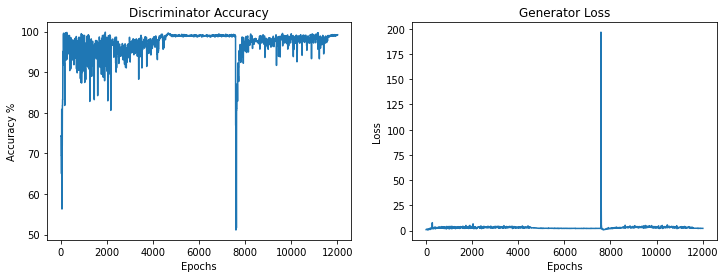

12001 [D loss: 0.050466, acc.: 99.02%] [G loss: 2.127630]
12002 [D loss: 0.030684, acc.: 99.41%] [G loss: 2.322252]
12003 [D loss: 0.070975, acc.: 98.63%] [G loss: 2.158918]
12004 [D loss: 0.041799, acc.: 99.22%] [G loss: 2.375490]
12005 [D loss: 0.049031, acc.: 99.02%] [G loss: 2.129537]
12006 [D loss: 0.042898, acc.: 99.22%] [G loss: 2.067351]
12007 [D loss: 0.051983, acc.: 99.02%] [G loss: 2.163807]
12008 [D loss: 0.066681, acc.: 98.63%] [G loss: 2.231430]
12009 [D loss: 0.061345, acc.: 98.83%] [G loss: 2.058633]
12010 [D loss: 0.085469, acc.: 98.24%] [G loss: 1.840379]
12011 [D loss: 0.048382, acc.: 99.02%] [G loss: 1.999687]
12012 [D loss: 0.049920, acc.: 99.02%] [G loss: 2.152783]
12013 [D loss: 0.040858, acc.: 99.22%] [G loss: 2.216475]
12014 [D loss: 0.077215, acc.: 98.44%] [G loss: 2.042722]
12015 [D loss: 0.099535, acc.: 97.85%] [G loss: 1.957944]
12016 [D loss: 0.020775, acc.: 99.80%] [G loss: 1.976136]
12017 [D loss: 0.066125, acc.: 98.63%] [G loss: 2.011678]
12018 [D loss:

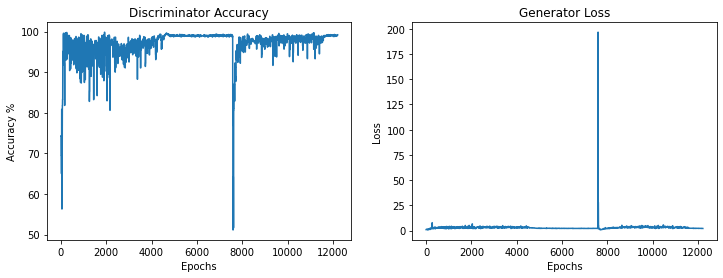

12201 [D loss: 0.032194, acc.: 99.41%] [G loss: 2.345799]
12202 [D loss: 0.066656, acc.: 98.63%] [G loss: 1.967668]
12203 [D loss: 0.076831, acc.: 98.44%] [G loss: 1.784194]
12204 [D loss: 0.025607, acc.: 99.61%] [G loss: 2.219030]
12205 [D loss: 0.072584, acc.: 98.44%] [G loss: 2.351244]
12206 [D loss: 0.084574, acc.: 98.24%] [G loss: 1.952286]
12207 [D loss: 0.034909, acc.: 99.41%] [G loss: 2.015269]
12208 [D loss: 0.039267, acc.: 99.22%] [G loss: 2.289435]
12209 [D loss: 0.043476, acc.: 99.22%] [G loss: 1.918867]
12210 [D loss: 0.047497, acc.: 99.02%] [G loss: 2.124177]
12211 [D loss: 0.041011, acc.: 99.22%] [G loss: 2.279778]
12212 [D loss: 0.044002, acc.: 99.22%] [G loss: 2.300612]
12213 [D loss: 0.067444, acc.: 98.63%] [G loss: 2.091556]
12214 [D loss: 0.042726, acc.: 99.22%] [G loss: 1.868547]
12215 [D loss: 0.074855, acc.: 98.44%] [G loss: 2.072719]
12216 [D loss: 0.035073, acc.: 99.41%] [G loss: 1.904306]
12217 [D loss: 0.059421, acc.: 98.83%] [G loss: 1.839261]
12218 [D loss:

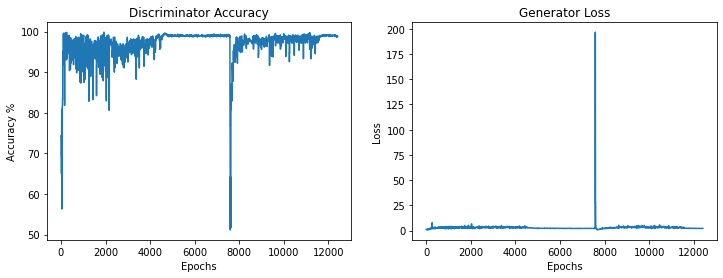

12401 [D loss: 0.050145, acc.: 99.02%] [G loss: 1.931041]
12402 [D loss: 0.048600, acc.: 99.02%] [G loss: 2.206338]
12403 [D loss: 0.057784, acc.: 98.83%] [G loss: 2.032386]
12404 [D loss: 0.066488, acc.: 98.63%] [G loss: 1.822458]
12405 [D loss: 0.059345, acc.: 98.83%] [G loss: 1.956238]
12406 [D loss: 0.019541, acc.: 99.80%] [G loss: 2.139295]
12407 [D loss: 0.059056, acc.: 98.83%] [G loss: 2.050157]
12408 [D loss: 0.040547, acc.: 99.22%] [G loss: 2.354201]
12409 [D loss: 0.069534, acc.: 98.63%] [G loss: 1.888516]
12410 [D loss: 0.058709, acc.: 98.83%] [G loss: 2.263673]
12411 [D loss: 0.032674, acc.: 99.41%] [G loss: 2.309287]
12412 [D loss: 0.032260, acc.: 99.41%] [G loss: 2.163710]
12413 [D loss: 0.067868, acc.: 98.63%] [G loss: 2.106424]
12414 [D loss: 0.043479, acc.: 99.22%] [G loss: 2.341877]
12415 [D loss: 0.059572, acc.: 98.83%] [G loss: 1.943622]
12416 [D loss: 0.063998, acc.: 98.63%] [G loss: 1.955112]
12417 [D loss: 0.054211, acc.: 99.02%] [G loss: 2.282880]
12418 [D loss:

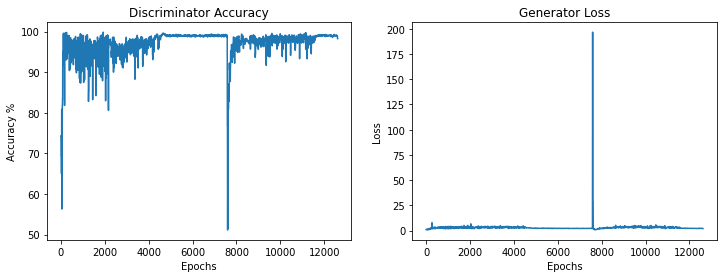

12601 [D loss: 0.064589, acc.: 98.63%] [G loss: 1.791583]
12602 [D loss: 0.034898, acc.: 99.41%] [G loss: 1.835686]
12603 [D loss: 0.065365, acc.: 98.63%] [G loss: 1.903312]
12604 [D loss: 0.044098, acc.: 99.22%] [G loss: 2.298305]
12605 [D loss: 0.049727, acc.: 99.02%] [G loss: 2.058764]
12606 [D loss: 0.048304, acc.: 99.02%] [G loss: 1.877257]
12607 [D loss: 0.041285, acc.: 99.22%] [G loss: 2.122727]
12608 [D loss: 0.057582, acc.: 98.83%] [G loss: 1.886628]
12609 [D loss: 0.039865, acc.: 99.22%] [G loss: 1.856666]
12610 [D loss: 0.024333, acc.: 99.61%] [G loss: 2.481919]
12611 [D loss: 0.058244, acc.: 98.83%] [G loss: 2.348373]
12612 [D loss: 0.024923, acc.: 99.61%] [G loss: 2.360240]
12613 [D loss: 0.032446, acc.: 99.41%] [G loss: 2.162545]
12614 [D loss: 0.053913, acc.: 99.02%] [G loss: 2.118782]
12615 [D loss: 0.038101, acc.: 99.22%] [G loss: 2.170999]
12616 [D loss: 0.067823, acc.: 98.63%] [G loss: 1.800621]
12617 [D loss: 0.066516, acc.: 98.63%] [G loss: 2.192642]
12618 [D loss:

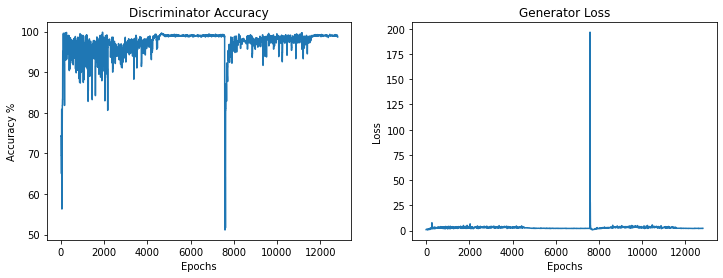

12801 [D loss: 0.060201, acc.: 98.83%] [G loss: 2.167502]
12802 [D loss: 0.049733, acc.: 99.02%] [G loss: 2.220559]
12803 [D loss: 0.016310, acc.: 99.80%] [G loss: 2.451752]
12804 [D loss: 0.060888, acc.: 98.83%] [G loss: 2.098963]
12805 [D loss: 0.051647, acc.: 99.02%] [G loss: 1.912367]
12806 [D loss: 0.025516, acc.: 99.61%] [G loss: 2.157265]
12807 [D loss: 0.078851, acc.: 98.44%] [G loss: 1.989199]
12808 [D loss: 0.032960, acc.: 99.41%] [G loss: 2.177864]
12809 [D loss: 0.023259, acc.: 99.61%] [G loss: 2.340703]
12810 [D loss: 0.088034, acc.: 98.44%] [G loss: 1.852782]
12811 [D loss: 0.009506, acc.: 100.00%] [G loss: 2.228910]
12812 [D loss: 0.056831, acc.: 98.83%] [G loss: 2.145313]
12813 [D loss: 0.042278, acc.: 99.22%] [G loss: 2.022739]
12814 [D loss: 0.041528, acc.: 99.22%] [G loss: 2.586887]
12815 [D loss: 0.059798, acc.: 98.83%] [G loss: 1.840619]
12816 [D loss: 0.025108, acc.: 99.61%] [G loss: 2.512946]
12817 [D loss: 0.030810, acc.: 99.41%] [G loss: 2.193088]
12818 [D loss

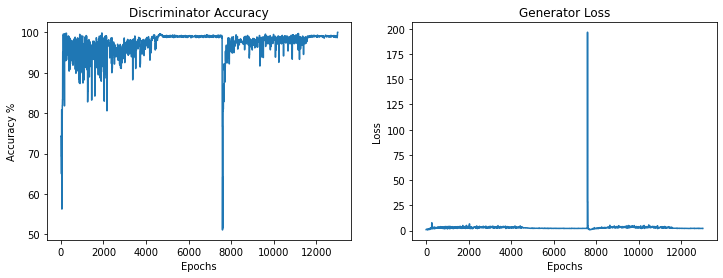

13001 [D loss: 0.052348, acc.: 99.02%] [G loss: 2.227746]
13002 [D loss: 0.042501, acc.: 99.22%] [G loss: 2.265569]
13003 [D loss: 0.070253, acc.: 98.63%] [G loss: 1.938204]
13004 [D loss: 0.066379, acc.: 98.63%] [G loss: 1.977070]
13005 [D loss: 0.058643, acc.: 98.83%] [G loss: 2.005441]
13006 [D loss: 0.065395, acc.: 98.63%] [G loss: 2.056450]
13007 [D loss: 0.091437, acc.: 98.05%] [G loss: 2.085385]
13008 [D loss: 0.063507, acc.: 98.63%] [G loss: 1.978637]
13009 [D loss: 0.050754, acc.: 99.02%] [G loss: 1.887012]
13010 [D loss: 0.060603, acc.: 98.83%] [G loss: 2.033018]
13011 [D loss: 0.041396, acc.: 99.22%] [G loss: 2.005155]
13012 [D loss: 0.026122, acc.: 99.61%] [G loss: 2.347506]
13013 [D loss: 0.084711, acc.: 98.24%] [G loss: 2.021116]
13014 [D loss: 0.024628, acc.: 99.61%] [G loss: 2.316351]
13015 [D loss: 0.064213, acc.: 98.63%] [G loss: 1.935115]
13016 [D loss: 0.051806, acc.: 99.02%] [G loss: 2.213908]
13017 [D loss: 0.033420, acc.: 99.41%] [G loss: 2.178570]
13018 [D loss:

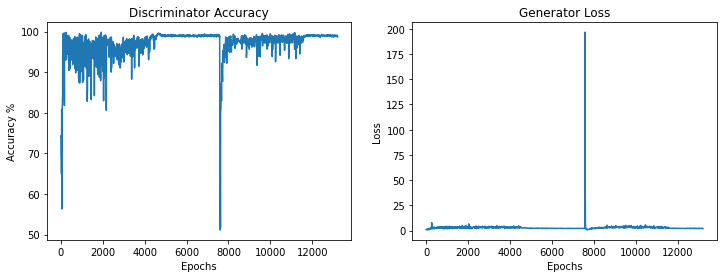

13201 [D loss: 0.023212, acc.: 99.61%] [G loss: 2.421892]
13202 [D loss: 0.094338, acc.: 98.05%] [G loss: 1.927711]
13203 [D loss: 0.034441, acc.: 99.41%] [G loss: 2.065646]
13204 [D loss: 0.023982, acc.: 99.61%] [G loss: 2.264587]
13205 [D loss: 0.092270, acc.: 98.05%] [G loss: 1.887722]
13206 [D loss: 0.035059, acc.: 99.41%] [G loss: 2.177999]
13207 [D loss: 0.040517, acc.: 99.22%] [G loss: 1.874112]
13208 [D loss: 0.071278, acc.: 98.63%] [G loss: 1.964081]
13209 [D loss: 0.018893, acc.: 99.80%] [G loss: 1.936750]
13210 [D loss: 0.059147, acc.: 98.83%] [G loss: 2.098031]
13211 [D loss: 0.041277, acc.: 99.22%] [G loss: 2.132610]
13212 [D loss: 0.073341, acc.: 98.44%] [G loss: 2.060523]
13213 [D loss: 0.035335, acc.: 99.41%] [G loss: 1.933696]
13214 [D loss: 0.032963, acc.: 99.41%] [G loss: 1.963554]
13215 [D loss: 0.050734, acc.: 99.02%] [G loss: 2.265082]
13216 [D loss: 0.040288, acc.: 99.22%] [G loss: 2.101786]
13217 [D loss: 0.041951, acc.: 99.22%] [G loss: 2.229259]
13218 [D loss:

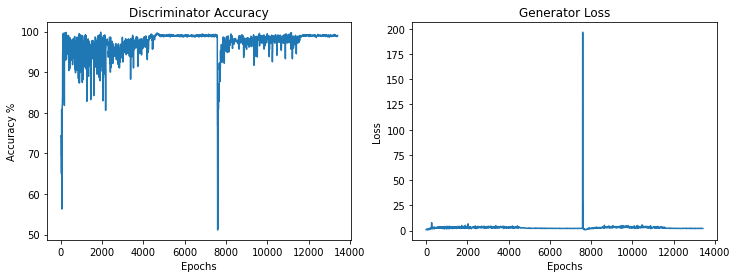

13401 [D loss: 0.041955, acc.: 99.22%] [G loss: 1.808212]
13402 [D loss: 0.024606, acc.: 99.61%] [G loss: 2.089359]
13403 [D loss: 0.059164, acc.: 98.83%] [G loss: 1.975069]
13404 [D loss: 0.016113, acc.: 99.80%] [G loss: 2.186366]
13405 [D loss: 0.112949, acc.: 97.66%] [G loss: 1.774862]
13406 [D loss: 0.063741, acc.: 98.63%] [G loss: 1.903700]
13407 [D loss: 0.030490, acc.: 99.41%] [G loss: 2.207049]
13408 [D loss: 0.033488, acc.: 99.41%] [G loss: 2.241071]
13409 [D loss: 0.047801, acc.: 99.02%] [G loss: 2.194062]
13410 [D loss: 0.088070, acc.: 98.24%] [G loss: 2.051279]
13411 [D loss: 0.058444, acc.: 98.83%] [G loss: 1.983510]
13412 [D loss: 0.043146, acc.: 99.22%] [G loss: 2.086165]
13413 [D loss: 0.076764, acc.: 98.44%] [G loss: 1.968571]
13414 [D loss: 0.076924, acc.: 98.44%] [G loss: 1.975128]
13415 [D loss: 0.079824, acc.: 98.24%] [G loss: 1.697415]
13416 [D loss: 0.081149, acc.: 98.24%] [G loss: 2.203715]
13417 [D loss: 0.058361, acc.: 98.83%] [G loss: 1.812218]
13418 [D loss:

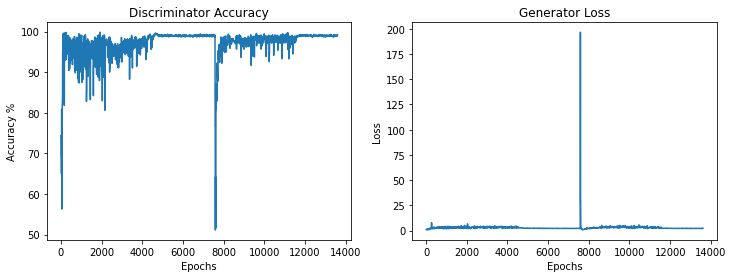

13601 [D loss: 0.079478, acc.: 98.44%] [G loss: 2.147520]
13602 [D loss: 0.048691, acc.: 99.02%] [G loss: 1.971031]
13603 [D loss: 0.066296, acc.: 98.63%] [G loss: 2.043751]
13604 [D loss: 0.042172, acc.: 99.22%] [G loss: 2.036458]
13605 [D loss: 0.084919, acc.: 98.24%] [G loss: 2.008954]
13606 [D loss: 0.050375, acc.: 99.02%] [G loss: 1.966551]
13607 [D loss: 0.034340, acc.: 99.41%] [G loss: 2.083302]
13608 [D loss: 0.082379, acc.: 98.24%] [G loss: 2.024547]
13609 [D loss: 0.072586, acc.: 98.44%] [G loss: 1.691386]
13610 [D loss: 0.050333, acc.: 99.02%] [G loss: 1.949673]
13611 [D loss: 0.072940, acc.: 98.44%] [G loss: 1.914312]
13612 [D loss: 0.026981, acc.: 99.61%] [G loss: 2.038270]
13613 [D loss: 0.050345, acc.: 99.02%] [G loss: 2.222133]
13614 [D loss: 0.016918, acc.: 99.80%] [G loss: 2.187810]
13615 [D loss: 0.067856, acc.: 98.63%] [G loss: 2.193029]
13616 [D loss: 0.060963, acc.: 98.83%] [G loss: 1.961567]
13617 [D loss: 0.058923, acc.: 98.83%] [G loss: 1.799420]
13618 [D loss:

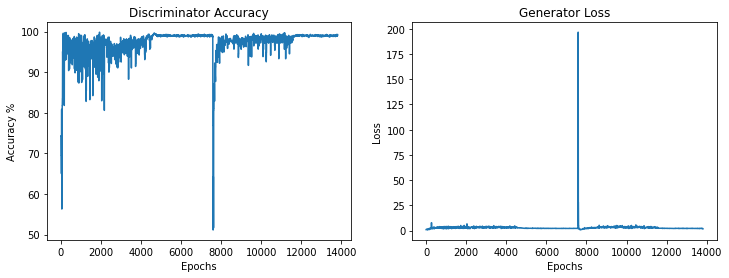

13801 [D loss: 0.065170, acc.: 98.63%] [G loss: 1.725027]
13802 [D loss: 0.049780, acc.: 99.02%] [G loss: 2.077105]
13803 [D loss: 0.048945, acc.: 99.02%] [G loss: 2.055870]
13804 [D loss: 0.025483, acc.: 99.61%] [G loss: 2.216290]
13805 [D loss: 0.058726, acc.: 98.83%] [G loss: 2.083483]
13806 [D loss: 0.048078, acc.: 99.02%] [G loss: 2.178204]
13807 [D loss: 0.082826, acc.: 98.24%] [G loss: 1.863106]
13808 [D loss: 0.072148, acc.: 98.44%] [G loss: 1.768568]
13809 [D loss: 0.041379, acc.: 99.22%] [G loss: 2.126225]
13810 [D loss: 0.033513, acc.: 99.41%] [G loss: 2.103700]
13811 [D loss: 0.041370, acc.: 99.22%] [G loss: 2.201892]
13812 [D loss: 0.025994, acc.: 99.61%] [G loss: 2.169215]
13813 [D loss: 0.050363, acc.: 99.02%] [G loss: 2.053951]
13814 [D loss: 0.032962, acc.: 99.41%] [G loss: 2.274274]
13815 [D loss: 0.066273, acc.: 98.63%] [G loss: 1.946848]
13816 [D loss: 0.036313, acc.: 99.41%] [G loss: 2.151111]
13817 [D loss: 0.082626, acc.: 98.24%] [G loss: 2.053054]
13818 [D loss:

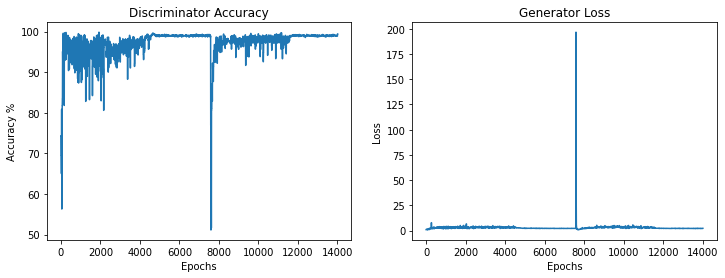

14001 [D loss: 0.048532, acc.: 99.02%] [G loss: 2.062081]
14002 [D loss: 0.058936, acc.: 98.83%] [G loss: 2.126335]
14003 [D loss: 0.041924, acc.: 99.22%] [G loss: 2.020312]
14004 [D loss: 0.032537, acc.: 99.41%] [G loss: 1.982208]
14005 [D loss: 0.039865, acc.: 99.22%] [G loss: 2.330211]
14006 [D loss: 0.070999, acc.: 98.63%] [G loss: 2.068303]
14007 [D loss: 0.051745, acc.: 99.02%] [G loss: 1.894066]
14008 [D loss: 0.065514, acc.: 98.63%] [G loss: 1.813067]
14009 [D loss: 0.105785, acc.: 97.66%] [G loss: 1.881555]
14010 [D loss: 0.063513, acc.: 98.63%] [G loss: 1.787644]
14011 [D loss: 0.080829, acc.: 98.24%] [G loss: 1.727126]
14012 [D loss: 0.065378, acc.: 98.63%] [G loss: 1.858770]
14013 [D loss: 0.055796, acc.: 98.83%] [G loss: 1.750886]
14014 [D loss: 0.064891, acc.: 98.63%] [G loss: 2.066990]
14015 [D loss: 0.018148, acc.: 99.80%] [G loss: 2.214921]
14016 [D loss: 0.051049, acc.: 99.02%] [G loss: 1.873670]
14017 [D loss: 0.033780, acc.: 99.41%] [G loss: 2.031937]
14018 [D loss:

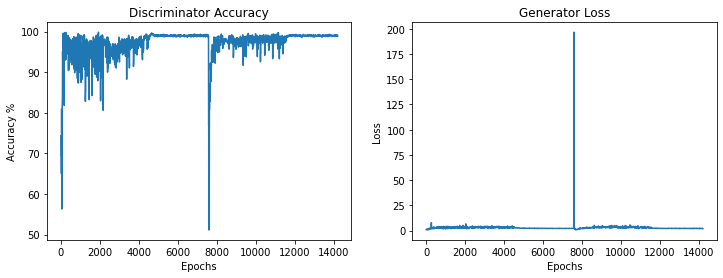

14201 [D loss: 0.040320, acc.: 99.22%] [G loss: 2.025650]
14202 [D loss: 0.056759, acc.: 98.83%] [G loss: 1.873093]
14203 [D loss: 0.065512, acc.: 98.63%] [G loss: 1.910438]
14204 [D loss: 0.065247, acc.: 98.63%] [G loss: 1.914645]
14205 [D loss: 0.057697, acc.: 98.83%] [G loss: 2.037213]
14206 [D loss: 0.074057, acc.: 98.44%] [G loss: 1.768722]
14207 [D loss: 0.033304, acc.: 99.41%] [G loss: 2.094967]
14208 [D loss: 0.039606, acc.: 99.22%] [G loss: 2.010394]
14209 [D loss: 0.052465, acc.: 99.02%] [G loss: 1.869474]
14210 [D loss: 0.049470, acc.: 99.02%] [G loss: 1.967814]
14211 [D loss: 0.024276, acc.: 99.61%] [G loss: 2.060467]
14212 [D loss: 0.040992, acc.: 99.22%] [G loss: 2.051878]
14213 [D loss: 0.057539, acc.: 98.83%] [G loss: 1.902003]
14214 [D loss: 0.024977, acc.: 99.61%] [G loss: 2.146178]
14215 [D loss: 0.040188, acc.: 99.22%] [G loss: 2.237087]
14216 [D loss: 0.067901, acc.: 98.63%] [G loss: 2.033258]
14217 [D loss: 0.046822, acc.: 99.02%] [G loss: 1.979640]
14218 [D loss:

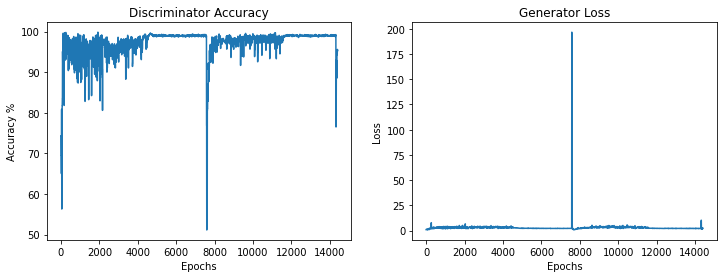

14401 [D loss: 0.178727, acc.: 95.12%] [G loss: 2.349872]
14402 [D loss: 0.070457, acc.: 97.66%] [G loss: 1.957009]
14403 [D loss: 0.228022, acc.: 91.41%] [G loss: 3.352513]
14404 [D loss: 0.282202, acc.: 91.21%] [G loss: 2.537145]
14405 [D loss: 0.216468, acc.: 92.77%] [G loss: 2.791117]
14406 [D loss: 0.152578, acc.: 94.92%] [G loss: 1.951379]
14407 [D loss: 0.241151, acc.: 92.97%] [G loss: 3.045992]
14408 [D loss: 0.441822, acc.: 84.38%] [G loss: 1.820800]
14409 [D loss: 0.157319, acc.: 93.16%] [G loss: 2.095088]
14410 [D loss: 0.123052, acc.: 95.51%] [G loss: 1.925723]
14411 [D loss: 0.192089, acc.: 93.16%] [G loss: 2.269076]
14412 [D loss: 0.105815, acc.: 97.66%] [G loss: 1.604975]
14413 [D loss: 0.321881, acc.: 89.26%] [G loss: 2.221015]
14414 [D loss: 0.141448, acc.: 93.55%] [G loss: 1.886998]
14415 [D loss: 0.195968, acc.: 93.95%] [G loss: 1.546530]
14416 [D loss: 0.116753, acc.: 96.09%] [G loss: 1.925646]
14417 [D loss: 0.089756, acc.: 97.85%] [G loss: 1.874257]
14418 [D loss:

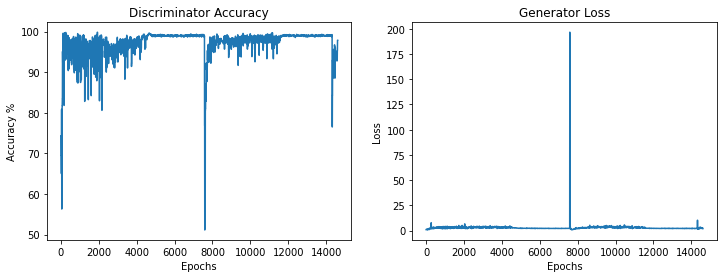

14601 [D loss: 0.257364, acc.: 91.60%] [G loss: 2.310595]
14602 [D loss: 0.202299, acc.: 93.36%] [G loss: 2.001913]
14603 [D loss: 0.197395, acc.: 94.14%] [G loss: 2.279304]
14604 [D loss: 0.084293, acc.: 98.05%] [G loss: 2.616629]
14605 [D loss: 0.167719, acc.: 93.36%] [G loss: 2.685645]
14606 [D loss: 0.068430, acc.: 97.85%] [G loss: 2.370349]
14607 [D loss: 0.161306, acc.: 94.73%] [G loss: 2.020458]
14608 [D loss: 0.083341, acc.: 96.68%] [G loss: 2.263380]
14609 [D loss: 0.068658, acc.: 98.83%] [G loss: 2.672273]
14610 [D loss: 0.062407, acc.: 98.05%] [G loss: 2.246206]
14611 [D loss: 0.336735, acc.: 83.98%] [G loss: 3.925984]
14612 [D loss: 0.424555, acc.: 86.13%] [G loss: 2.998900]
14613 [D loss: 0.063625, acc.: 97.46%] [G loss: 1.973540]
14614 [D loss: 0.149419, acc.: 95.31%] [G loss: 2.017520]
14615 [D loss: 0.089197, acc.: 97.07%] [G loss: 2.816404]
14616 [D loss: 0.151103, acc.: 94.34%] [G loss: 2.045608]
14617 [D loss: 0.154695, acc.: 97.07%] [G loss: 2.830591]
14618 [D loss:

KeyboardInterrupt: ignored

In [ ]:
class CGAN():
    def __init__(self, learning_rate):
        # Input shape
        self.img_rows = size[0]
        self.img_cols = size[1]
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 2
        self.latent_dim = 100
        optimizer = Adam(learning_rate, 0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'], optimizer=optimizer, metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])
        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'], optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        model.add(Dense(64, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(128, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))
        model_input = multiply([noise, label_embedding])
        img = model(model_input)
        return Model([noise, label], img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Dense(512, input_dim=np.prod(self.img_shape)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        flat_img = Flatten()(img)
        model_input = multiply([flat_img, label_embedding])
        validity = model(model_input)
        return Model([img, label], validity)
    
    def train(self, epochs, batch_size=128, sample_interval=50, file_path='output'):
        # Load the dataset
        X_train, y_train = load_image_data()
        # Configure input
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)
        y_train = y_train.reshape(-1, 1)
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        d_acc=[]        
        ge_loss=[]
        for epoch in range(epochs):
            # ---------------------
            #  Train Discriminator
            # ---------------------
            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))
            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            # ---------------------
            #  Train Generator
            # ---------------------
            # Condition on labels
            sampled_labels = np.random.randint(0, 2, batch_size).reshape(-1, 1)
            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)
            d_acc.append(100*d_loss[1])       
            ge_loss.append(g_loss) 
            n=10
            Aver_d_acc=list(chain.from_iterable([mean(d_acc[i:i+n])]*n for i in range(0,len(d_acc),n)))
            Aver_ge_loss=list(chain.from_iterable([mean(ge_loss[i:i+n])]*n for i in range(0,len(ge_loss),n)))            

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch, Aver_d_acc, Aver_ge_loss, file_path)
        
    def sample_images(self, epoch, Aver_d_acc, Aver_ge_loss, file_path):
        if not os.path.exists(file_path):
          os.mkdir(file_path)
        fig, axs = plt.subplots(1,2,figsize=(12,4))        
        axs[0].plot(range(0,len(Aver_d_acc)),Aver_d_acc)
        axs[0].set_title('Discriminator Accuracy')
        axs[0].set_ylabel('Accuracy %')
        axs[0].set_xlabel('Epochs')
        axs[0].ticklabel_format(style='plain',axis='x',useOffset=False)
        axs[1].plot(range(0,len(Aver_ge_loss)),Aver_ge_loss)
        axs[1].set_title('Generator Loss')
        axs[1].set_ylabel('Loss')
        axs[1].set_xlabel('Epochs')
        axs[1].ticklabel_format(style='plain',axis='x',useOffset=False)
        plt.show()
        noise = np.random.normal(0, 1, (1, 100))
        sampled_labels = np.random.randint(0, 2, 1)
        gen_imgs = self.generator.predict([noise, sampled_labels])
        gen_imgs = 0.5 * gen_imgs + 0.5
        plt.imshow(gen_imgs[0,:,:,0], cmap='gray')
        plt.axis('off')
        plt.savefig(file_path+"/%d.png" % epoch, bbox_inches='tight')
        plt.close()   


# 第一次 确定学习率实验
# cgan=CGAN(learning_rate=0.0001)
# cgan.train(epochs=10000, batch_size=32, sample_interval=200, file_path='LR0.0001_BS32_EP10000')

# cgan=CGAN(learning_rate=0.00001)
# cgan.train(epochs=10000, batch_size=32, sample_interval=200, file_path='LR0.00001_BS32_EP10000')

# cgan=CGAN(learning_rate=0.001)
# cgan.train(epochs=10000, batch_size=32, sample_interval=200, file_path='LR0.001_BS32_EP10000')

# 第四次 确定批处理尺寸（确定最优学习率为0.0005）
# cgan=CGAN(learning_rate=0.00001)
# cgan.train(epochs=20000, batch_size=16, sample_interval=200, file_path='LR0.00001_BS16_EP10000')

# cgan=CGAN(learning_rate=0.0005)
# cgan.train(epochs=20000, batch_size=32, sample_interval=200, file_path='LR0.0005_BS32_EP20000')

# cgan=CGAN(learning_rate=0.0005)
# cgan.train(epochs=20000, batch_size=64, sample_interval=200, file_path='LR0.0005_BS64_EP20000')
# cgan=CGAN(learning_rate=0.0005)
# cgan.train(epochs=20000, batch_size=128, sample_interval=200, file_path='LR0.0005_BS128_EP20000')
cgan=CGAN(learning_rate=0.0005)
cgan.train(epochs=20000, batch_size=256, sample_interval=200, file_path='LR0.0005_BS256_EP20000')